# <span style="color:blue">EDA Proyecto Individual II. Data Analytics <br><hr></span>  

## <span style="color:green">Introducción</span>

El presente notebook tiene por objetivo realizar un EDA sobre la base de datos de ENANCOM, referido al estado actual e histórico de las telecomunicaciones en Argentina.
El objetivo principal de este notebook es explorar y visualizar los datos. Previa corrección de los mismos y carga posterior en una base de datos para realizar distintos tipos de consultas.

## <span style="color:green">Desarrollo</span>

### <span style="color:orange">Importar librerias necesarias</span>

In [635]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import openpyxl
import warnings

In [636]:
warnings.filterwarnings('ignore', category=FutureWarning)


### <span style="color:orange">Lectura de archivos y selección de información</span>

Para investigar la información contenida en el archivo Internet.xlsx, importo la biblioteca pandas y leo el archivo Excel utilizando el método read_excel. Cargo todas las hojas en un diccionario de dataframes, donde la clave es el nombre de la hoja y el valor es el dataframe correspondiente.

In [637]:
dfs = pd.read_excel('./datasets/Internet.xlsx', sheet_name=None)
dfs.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])

Consulto la información de los dataframes para ver cuales conservar. Además creo un nuevo diccionario para almacenar las claves del anterior e ir almacenando las características de cada dataframe a utilizar.

In [638]:
dfs_descripcion = dict.fromkeys(dfs.keys())
dfs_descripcion

{'Acc_vel_loc_sinrangos': None,
 'Velocidad_sin_Rangos': None,
 'Accesos_tecnologia_localidad': None,
 'Velocidad % por prov': None,
 'Totales VMD': None,
 'Totales Accesos Por Tecnología': None,
 'Accesos Por Tecnología': None,
 'Penetración-poblacion': None,
 'Penetracion-hogares': None,
 'Penetracion-totales': None,
 'Totales Accesos por velocidad': None,
 'Accesos por velocidad': None,
 'Dial-BAf': None,
 'Totales Dial-BAf': None,
 'Ingresos ': None}

####  **Ingresos**
Primero conservaremos la hoja de Ingresos. Importante para evaluar el desarrollo económico de la actividad, a lo alrgo de los años.

In [639]:
df_ingreso = dfs['Ingresos ']
df_ingreso.head()


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


Añado descripción al diccionario de descripción.

In [640]:
dfs_descripcion['Ingresos '] = ['Ingresos totales de las empresas dedicadas a comunicaciones de internet, detallado por trimestre de cada año','df_ingreso']

#### **Penetración**
Conservamos las hojas correspondientes a los datos de penetración de la tecnología.

Primero los datos de evolución a nivel nacional

In [641]:
df_penetrecion_nacional = dfs['Penetracion-totales']
df_penetrecion_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [642]:
#Agrego la descripción de este df
dfs_descripcion['Penetracion-totales'] = ['Descripción de penetración por hogares y por personas, detallado por año y trimestre.','df_penetrecion_nacional']

Luego conservo los datos de penetración por habitantes y por hogares

In [643]:
df_pen_hogar = dfs['Penetracion-hogares']
df_pen_hogar.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [644]:
dfs_descripcion['Penetracion-hogares'] = ['Cantidad de puntos de acceso a internet por cada 100 hogares, detallado por año, trimestre y provincias','df_pen_hogar']

In [645]:
df_pen_hogar.groupby(['Año','Trimestre']).describe()

Accesos por cada 100 hogares                                   \
                                      count       mean        std        min   
Año  Trimestre                                                                 
2014 1                                 24.0  36.194403  21.739900   9.347208   
     2                                 24.0  36.636094  21.920004   9.717910   
     3                                 24.0  37.342226  22.578642   9.711211   
     4                                 24.0  37.394659  22.295057   9.786393   
2015 1                                 24.0  38.509014  22.657474   9.716049   
     2                                 24.0  38.970551  22.911551   9.707972   
     3                                 24.0  39.643378  23.299081   9.706503   
     4                                 24.0  39.669670  22.916238   9.705769   
2016 1                                 24.0  38.922069  22.310723   9.586346   
     2                                 24.0  39.889570  23.461813   9.603734   
     3                                 24.0  40.310760  23.754287   9.630540   
     4                                 24.0  40.434733  23.887797   9.640682   
2017 1                                 24.0  39.560191  22.048878   9.545500   
     2                                 24.0  40.291671  24.330545   9.513970   
     3                                 24.0  45.370929  21.989504  15.477862   
     4                                 24.0  44.878119  22.932143  10.586731   
2018 1                                 24.0  45.953290  20.158354  15.148790   
     2                                 24.0  47.533342  21.436585  15.150424   
     3                                 24.0  49.637932  20.715069  23.263700   
     4                                 24.0  50.785806  20.858614  23.689194   
2019 1                                 24.0  51.338738  21.132399  23.667655   
     2                                 24.0  54.309464  21.299278  28.846063   
     3                                 24.0  55.469070  21.627084  30.112433   
     4                                 24.0  53.548154  18.730231  30.471313   
2020 1                                 24.0  53.355192  18.585636  30.228304   
     2                                 24.0  55.361510  18.030680  31.139436   
     3                                 24.0  57.361304  18.328316  31.905623   
     4                                 24.0  58.444540  18.623712  32.487382   
2021 1                                 24.0  59.078071  18.223221  32.732956   
     2                                 24.0  61.046174  18.288508  33.225484   
     3                                 24.0  63.013691  19.612378  33.962034   
     4                                 24.0  64.776135  20.165857  34.454575   
2022 1                                 24.0  65.900750  20.208955  34.955687   
     2                                 24.0  67.783333  20.529260  43.150000   
     3                                 24.0  68.580833  20.672624  43.190000   
     4                                 24.0  69.029583  21.133851  39.410000   
2023 1                                 24.0  69.170833  21.491061  38.790000   
     2                                 24.0  69.053750  21.355083  38.320000   
     3                                 24.0  69.942083  21.589283  38.860000   
     4                                 24.0  72.004583  21.279155  39.230000   
2024 1                                 24.0  72.042917  21.345511  39.610000   

                                                             
                      25%        50%        75%         max  
Año  Trimestre                                               
2014 1          21.917172  30.426108  47.992077  112.254123  
     2          22.171209  30.737623  48.719663  113.143352  
     3          22.368818  30.767932  50.455316  113.800512  
     4          23.139519  31.086622  50.318001  114.896766  
2015 1          26.006570  31.187838  50.671980  114.896997 

Al realizar descripción estadística de los datos de penetración por hogar, la media no coincide con el valor registrado en la tabla de penetración nacional. Esto ocurre por que la media nacional  es calculada con todos los accesos y todos los hogares del país. Un dato que no se puede calcular con la tabla de penetración por hogar. Por lo tanto, conservo ambos ya que la media nacional puede servir para dar un panorama general.

Por otro lado, se observa una evolución de crecimiento que más adelante podremos analizar

Controlo los valores de penetración por población

In [646]:
df_pen_poblacion = dfs['Penetración-poblacion']
df_pen_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [647]:
dfs_descripcion['Penetración-poblacion'] = ['Cantidad de puntos de acceso a internet por cada 100 habitantes, detallado por año, trimestre y provincias','df_pen_poblacion']

In [648]:
df_pen_poblacion.groupby(['Año','Trimestre']).describe()

Accesos por cada 100 hab                                   \
                                  count       mean        std        min   
Año  Trimestre                                                             
2014 1                             24.0  10.898731   8.308697   2.684669   
     2                             24.0  10.997066   8.369707   2.781512   
     3                             24.0  11.183974   8.553252   2.770051   
     4                             24.0  11.151011   8.489163   2.781957   
2015 1                             24.0  11.574764   8.607913   2.790401   
     2                             24.0  11.676198   8.691446   2.778618   
     3                             24.0  11.842587   8.835471   2.768812   
     4                             24.0  11.813529   8.738948   2.759292   
2016 1                             24.0  11.686046   8.536127   2.752950   
     2                             24.0  11.956545   8.940200   2.748730   
     3                             24.0  12.047460   9.020667   2.747243   
     4                             24.0  12.050664   9.042782   2.741027   
2017 1                             24.0  12.047223   9.042803   2.731984   
     2                             24.0  12.342974  10.139556   2.723000   
     3                             24.0  13.719669   9.495101   4.429809   
     4                             24.0  13.609577   9.753867   3.029927   
2018 1                             24.0  13.819501   8.502557   4.335615   
     2                             24.0  14.270190   8.763909   4.336138   
     3                             24.0  14.887830   8.665577   5.949166   
     4                             24.0  15.177253   8.645384   7.049080   
2019 1                             24.0  15.351482   8.755119   7.042692   
     2                             24.0  16.197250   8.791249   7.742196   
     3                             24.0  16.544147   8.926037   7.664178   
     4                             24.0  15.932594   8.070799   7.755476   
2020 1                             24.0  15.872215   8.016977   7.693633   
     2                             24.0  16.424323   7.876775   7.925540   
     3                             24.0  17.006347   7.994678   8.120337   
     4                             24.0  17.327362   8.087407   8.268391   
2021 1                             24.0  17.504511   7.998163   8.330895   
     2                             24.0  18.049848   7.988336   8.456293   
     3                             24.0  18.639783   8.331445   8.643582   
     4                             24.0  19.161457   8.490252   8.768865   
2022 1                             24.0  19.483505   8.520720   8.896427   
     2                             24.0  20.046800   8.900802  11.049815   
     3                             24.0  20.277083   8.966244  11.140000   
     4                             24.0  20.411250   9.054252  10.030000   
2023 1                             24.0  20.460833   9.131746   9.870000   
     2                             24.0  20.396250   8.855723   9.750000   
     3                             24.0  20.653750   8.927049   9.890000   
     4                             24.0  21.269583   8.894463   9.980000   
2024 1                             24.0  21.290833   8.994005  10.080000   

                                                            
                      25%        50%        75%        max  
Año  Trimestre                                              
2014 1           5.807199   8.492271  14.931150  42.655072  
     2           5.859482   8.577081  15.157415  42.974777  
     3           5.896651   8.362459  15.718526  43.206400  
     4           6.084412   8.425395  15.560881  43.604621  
2015 1           6.880441   8.555253  15.602881  43.658725  
     2           6.900359   8.449626  15.883888  44.084854  
     3           6.911559   8.599912  16.237402  44.911092  
     4           6.916211   8.579575  16.662784  44.832984  

#### **Accesos**

Revisamos los accesos disponibles a distintos tipos de tegnologías de internet.

In [649]:
dfs['Accesos Por Tecnología'].head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [650]:
df_acc_tegnologia = dfs['Accesos Por Tecnología']

In [651]:
dfs['Accesos_tecnologia_localidad'].groupby('Provincia').sum(numeric_only=True)

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
Provincia,,,,,,,,,
BUENOS AIRES,203297,2790663,5900,1799013,92651,1061,1682,150290,5044557
CABA,70108,1177475,2050,203756,46762,67,0,4493,1504711
CATAMARCA,5901,11025,1,56542,1,79,0,1384,74933
CHACO,11343,58929,5,64463,12323,76,0,8404,155543
CHUBUT,26306,77217,857,26356,8906,167,0,30867,170676
CORDOBA,102812,449784,63,458985,9268,95,71,61121,1082199
CORRIENTES,18390,85595,3,38268,5093,77,59,10409,157894
ENTRE RIOS,36574,158283,20,66180,11297,24,224,23950,296552
FORMOSA,9147,18631,0,17908,128,53,0,16851,62718


In [652]:
df_acc_teg_localidad = dfs['Accesos_tecnologia_localidad']

Por lo que observo, en el df 'Accesos_tecnologia_localidad' se detalla los tipos de acceso a la tecnología en cada localidad, pero sólo correspondiente al año 2024. Es decir, los últimos datos, mientras que en el df 'Accesos Por Tecnología' se detallan el acceso a los tipos de tegnologías discriminados sólo por Provincia, año y trimestre.

In [653]:
dfs_descripcion['Accesos_tecnologia_localidad'] = ['Descripción del acceso a los tipos de tegnologías (ADSL, Cablemodem, DialUP, Fibra Óptica, otros, satelital, wimax, wireless), discriminados por localidad y provincia','df_acc_teg_localidad']

In [654]:
dfs_descripcion['Accesos Por Tecnología'] = ['Descripción de tipos de acceso a internet (ADSL, Cablemodem, Fibra óptica, Wireless, Otros), discriminados por provincia, trimestre y año','df_acc_tegnologia']

##### Acceso por velocidad

In [655]:
df_acc_vel = dfs['Accesos por velocidad']
df_acc_vel

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
980,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
981,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
982,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


In [656]:
dfs_descripcion['Accesos por velocidad'] = ['Descripción de accesos a internet por distintos rangos de velocidades, discriminado por provincia, trimestre y año','df_acc_vel']

In [657]:
df_acc_vel_localidad = dfs['Acc_vel_loc_sinrangos']

In [658]:
df_acc_vel_localidad.fillna(0)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [659]:
df_acc_vel_localidad['Total'] = df_acc_vel_localidad.sum(numeric_only=True, axis=1)

In [660]:
df_acc_vel_localidad.groupby('Provincia').sum(numeric_only=True)

,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps,Total
Provincia,,,,,,,,,,,,,,,,,,,,,
BUENOS AIRES,125147.0,18.0,25815.0,169.0,4611.0,17899.0,141.0,19520.0,0.0,21.0,...,0.0,563.0,0.0,0.0,26.0,156691.0,0.0,0.0,0.0,5044557.0
CABA,0.0,31.0,451.0,34.0,1307.0,4111.0,0.0,249.0,0.0,0.0,...,1.0,1.0,0.0,0.0,25.0,68405.0,0.0,0.0,0.0,1504711.0
CATAMARCA,70.0,0.0,34.0,37.0,0.0,176.0,0.0,115.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,74933.0
CHACO,3816.0,0.0,234.0,2.0,0.0,416.0,0.0,780.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,155543.0
CHUBUT,16640.0,8.0,69.0,34.0,836.0,247.0,0.0,1870.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,170676.0
CORDOBA,14710.0,2.0,87.0,10.0,83.0,7973.0,7.0,7589.0,18.0,133.0,...,1.0,0.0,1.0,0.0,0.0,3190.0,0.0,0.0,1.0,1082199.0
CORRIENTES,6242.0,0.0,10.0,57.0,118.0,2572.0,0.0,1721.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,266.0,0.0,0.0,0.0,157894.0
ENTRE RIOS,13975.0,1.0,20.0,86.0,113.0,4177.0,0.0,4821.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,708.0,0.0,0.0,0.0,296552.0
FORMOSA,302.0,1.0,49.0,35.0,0.0,158.0,0.0,1447.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,109.0,0.0,0.0,0.0,62718.0


'Acc_vel_loc_sinrangos' describe los accesos a internet discriminados por localidad, sin rangos de velociada. Una descripción más detallada pero sólo contiene datos del 2024.

In [661]:
dfs_descripcion['Acc_vel_loc_sinrangos'] = ['Describe los accesos a internet discriminados por localidad, sin rangos de velociada. Una descripción más detallada pero sólo contiene datos del 2024.','df_acc_vel_localidad']

#### **Diferencia Dial-up o Banda ancha**

In [662]:
df_dial_vs_bancha = dfs['Dial-BAf']
df_dial_vs_bancha

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5038657,5900.0,5044557
1,2024,1,Capital Federal,1502661,2050.0,1504711
2,2024,1,Catamarca,74932,1.0,74933
3,2024,1,Chaco,155538,5.0,155543
4,2024,1,Chubut,169819,857.0,170676
...,...,...,...,...,...,...
979,2014,1,Santa Cruz,26304,460.0,26764
980,2014,1,Santa Fe,506000,612.0,506612
981,2014,1,Santiago Del Estero,37124,9.0,37133
982,2014,1,Tierra Del Fuego,27272,766.0,28038


'Dial-BAf' es un df que muestra los accesos a internet, separados por tipo de conexión (banda ancha o cable de teléfono). Y discriminando por provincia, trimestre y año. Lo que he notado es que la suma total de esto también coincide con el total de los otros df. Es decir que la información de las conexiones se van desagregando, en cuanto a las características

In [663]:
dfs_descripcion['Dial-BAf'] = ['Descripción de los accesos a internet diferenciando entre Banda Ancha y dial-up. Discriminando entre provincias, trimestre y años','df_dial_vs_bancha']

#### **Totales**

Reviso las hojas que incluyen totales

##### Totales Dial-Baf

In [664]:
dfs['Totales Dial-BAf'].head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,1,11621363,11793,11633156,Ene-Mar 2024
1,2023,4,11535868,11793,11547661,Oct-Dic 2023
2,2023,3,11395115,11793,11406908,Jul-Sept 2023
3,2023,2,11239781,12116,11251897,Abr-Jun 2023
4,2023,1,11229459,12436,11241895,Ene-Mar 2023


In [665]:
df_dial_vs_bancha.groupby(['Año', 'Trimestre']).sum(numeric_only=True).tail()

Banda ancha fija  Dial up     Total
Año  Trimestre                                     
2023 1                  11229459  12436.0  11241895
     2                  11239781  12116.0  11251897
     3                  11395115  11793.0  11406908
     4                  11535868  11793.0  11547661
2024 1                  11621363  11793.0  11633156

Como puede verse podré obtener la misma información haciendo resumen del df 'Dial-Baf'. Elimino esta clave de mi diccionario de descripciones

In [666]:
dfs_descripcion.pop('Totales Dial-BAf')

##### Totales Accesos Por Tecnología

In [667]:
dfs['Totales Accesos Por Tecnología'].head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


In [668]:
df_acc_tegnologia.groupby(['Año','Trimestre']).sum().tail(10)

Provincia  \
Año    Trimestre                                                                                               
2022   4                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
2023   1                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
       2                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
       3                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
       4                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
2024   1                                                   Buenos AiresCapital FederalCatamarcaChacoChubu...   
*      Los datos provinciales no coinciden a nivel nac...                                                  0   
2019 * 1 *                                                 Buenos AiresCapital FederalCatamarcaChacoChubu...   
       2 *                                                 Buenos AiresCapital FederalCatamarcaChacoChubu...   
       3 *                                                 Buenos AiresCapital FederalCatamarcaChacoChubu...   

                                                                ADSL  \
Año    Trimestre                                                       
2022   4                                                   1315373.0   
2023   1                                                   1204417.0   
       2                                                   1006509.0   
       3                                                    897895.0   
       4                                                    836390.0   
2024   1                                                    774475.0   
*      Los datos provinciales no coinciden a nivel nac...        0.0   
2019 * 1 *                                                 3326284.0   
       2 *                                                 3243795.0   
       3 *                                                 3204204.0   

                                                           Cablemodem  \
Año    Trimestre                                                        
2022   4                                                    6037457.0   
2023   1                                                    6002582.0   
       2                                                    5997149.0   
       3                                                    6018832.0   
       4                                                    6022532.0   
2024   1                                                    5986957.0   
*      Los datos provinciales no coinciden a nivel nac...         0.0   
2019 * 1 *                                                  4435439.0   
       2 *                                                  4635575.0   
       3 *                                                  4800091.0   

                                                           Fibra óptica  \
Año    Trimestre                                                          
2022   4                                                      3060575.0   
2023   1                                                      3243411.0   
       2                                                      3463988.0   
       3                                                      3708718.0   
       4                                                      3908183.0   
2024   1                                                      4015101.0   
*      Los datos provinciales no coinciden a nivel nac...           0.0   
2019 * 1 *                                                     443604.0   
       2 *                                                     507456.0   
       3 *                                                     557822.0   

                                                           Wireless     Otros  \
Año    Trimestre              

Comparo con el resultado de agrupar los datos de 'Accesos por tegnología' por año y trimestre y son los mismos que en la hoja de 'Totales Accesos Por Tegnología'. Además hay una descripción que aclara diferencias esperables por errores de carga en los resultados a nivel nacional.

Descarto esta última y elimino de mi diccionario de descripciones. Los asteriscos serán borrados en un siguiente paso.

In [669]:
dfs_descripcion.pop('Totales Accesos Por Tecnología')

##### Totales Accesos Por Velocidad

In [670]:
dfs['Totales Accesos por velocidad'].head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
1,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
2,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
3,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
4,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895


Comparo con el resultado de resumir los datos de 'Accesos Por Velocidad'

In [671]:
df_acc_vel.groupby(['Año','Trimestre']).sum().tail()

Provincia  \
Año  Trimestre                                                      
2023 1          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     2          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     3          Buenos AiresCapital FederalCatamarcaChacoChubu...   
2024 1          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     4          Buenos AiresCapital FederalCatamarcaChacoChubu...   

                HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
Año  Trimestre                                                           
2023 1                 31437.0              82048.0          1001553.0   
     2                 30827.0              79405.0           963510.0   
     3                 30274.0              80609.0           945608.0   
2024 1                 28801.0              69355.0           866152.0   
     4                 29708.0              71742.0           900253.0   

                + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
Año  Trimestre                                                                 
2023 1                   1060321.0             729194.0             357769.0   
     2                   1028250.0             734125.0             364730.0   
     3                    998725.0             720084.0             350918.0   
2024 1                    950930.0             672155.0             353896.0   
     4                    978108.0             697232.0             350290.0   

                + 30 Mbps     OTROS       Total  
Año  Trimestre                                   
2023 1          7564819.0  414754.0  11241895.0  
     2          7775095.0  275955.0  11251897.0  
     3          8003269.0  277421.0  11406908.0  
2024 1          8363694.0  328173.0  11633156.0  
     4          8224736.0  295592.0  11547661.0

Como se observa también puedo obtener el resultado haciendo resúmen en la hoja de 'Accesos Por Velocidad'. Sin embargo descubro un error en el año 2024, tiene registros para el 4º trimestre mientras al año 2023 no tiene valores para el mismo trimestre. Los totales del 4ºtrimestre 2024, coinciden  con los totales del 4º trimestre 2023 de la hoja Totales. Asi que procedo a corregirlos.

In [672]:
mask = df_acc_vel['Trimestre'] == 4
mask1 = df_acc_vel['Año'] == 2024
df_acc_vel.loc[mask & mask1, 'Año'] = 2023


Controlo de nuevo los datos

In [673]:
df_acc_vel.groupby(['Año','Trimestre']).sum().tail()

Provincia  \
Año  Trimestre                                                      
2023 1          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     2          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     3          Buenos AiresCapital FederalCatamarcaChacoChubu...   
     4          Buenos AiresCapital FederalCatamarcaChacoChubu...   
2024 1          Buenos AiresCapital FederalCatamarcaChacoChubu...   

                HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
Año  Trimestre                                                           
2023 1                 31437.0              82048.0          1001553.0   
     2                 30827.0              79405.0           963510.0   
     3                 30274.0              80609.0           945608.0   
     4                 29708.0              71742.0           900253.0   
2024 1                 28801.0              69355.0           866152.0   

                + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
Año  Trimestre                                                                 
2023 1                   1060321.0             729194.0             357769.0   
     2                   1028250.0             734125.0             364730.0   
     3                    998725.0             720084.0             350918.0   
     4                    978108.0             697232.0             350290.0   
2024 1                    950930.0             672155.0             353896.0   

                + 30 Mbps     OTROS       Total  
Año  Trimestre                                   
2023 1          7564819.0  414754.0  11241895.0  
     2          7775095.0  275955.0  11251897.0  
     3          8003269.0  277421.0  11406908.0  
     4          8224736.0  295592.0  11547661.0  
2024 1          8363694.0  328173.0  11633156.0

Ahora si, corregido el valor descartamos la hoja 'Totales Por Velocidad'. Y la elimino de mi diiccionario de descripciones.

In [674]:
dfs_descripcion.pop('Totales Accesos por velocidad')

##### Totales VMD

In [675]:
dfs['Totales VMD'].head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.15,Ene-Mar 2024
1,2023,4,139.04,Oct-Dic 2023
2,2023,3,129.67,Jul-Sept 2023
3,2023,2,123.95,Abr-Jun 2023
4,2023,1,110.50,Ene-Mar 2023


Conservo el df como está por ahora.

In [676]:
df_vmd = dfs['Totales VMD']

Incluyo la descripción

In [677]:
dfs_descripcion['Totales VMD'] = ['Describe la velocidad media de bajada nacionales discriminados por año y trimestre','df_vmd']

#### Velocidad

In [678]:
dfs['Velocidad_sin_Rangos'].head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cargo el df del diccionario a un nuevo objeto

In [679]:
df_vel_sin_rango = dfs['Velocidad_sin_Rangos']

Creo una máscara para después crear una columna de total de accesos

In [680]:
df_vel_sin_rango['Totales'] = df_vel_sin_rango.iloc[:,3:].sum(axis=1)

In [681]:
df_vel_sin_rango.groupby(['Año','Trimestre']).sum().tail()

Provincia     Otros  \
Año    Trimestre                                                                
2023.0 1.0        Buenos AiresCapital FederalCatamarcaChacoChubu...  414754.0   
       2.0        Buenos AiresCapital FederalCatamarcaChacoChubu...  328173.0   
       3.0        Buenos AiresCapital FederalCatamarcaChacoChubu...  277421.0   
       4.0        Buenos AiresCapital FederalCatamarcaChacoChubu...  295592.0   
2024.0 1.0        Buenos AiresCapital FederalCatamarcaChacoChubu...  328173.0   

                  0,256 Mbps  0,375 Mbps  0,625 Mbps  0,5 Mbps  0,512 Mbps  \
Año    Trimestre                                                             
2023.0 1.0              97.0         0.0         0.0   30188.0      1152.0   
       2.0             106.0         0.0         0.0   27592.0      1103.0   
       3.0             107.0         0.0         0.0   29011.0      1156.0   
       4.0             107.0         0.0         0.0   28480.0      1121.0   
2024.0 1.0             106.0         0.0         0.0   27592.0      1103.0   

                  0,75 Mbps   1 Mbps  1,2 Mbps  ...  2529 Mbps  3072 Mbps  \
Año    Trimestre                                ...                         
2023.0 1.0          11243.0  70805.0       0.0  ...        0.0        0.0   
       2.0          11243.0  58112.0       0.0  ...        0.0        0.0   
       3.0          11243.0  69366.0       0.0  ...        0.0        0.0   
       4.0          11243.0  60499.0       0.0  ...        0.0        0.0   
2024.0 1.0          11243.0  58112.0       0.0  ...        0.0        0.0   

                  4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 Mbps  \
Año    Trimestre                                                          
2023.0 1.0              0.0        0.0        0.0        0.0        0.0   
       2.0              1.0        0.0        0.0        0.0        0.0   
       3.0              0.0        0.0        0.0        0.0        0.0   
       4.0              0.0        0.0        0.0        0.0        0.0   
2024.0 1.0              1.0        0.0        0.0        0.0        0.0   

                  8000 Mbps  10000 Mbps     Totales  
Año    Trimestre                                     
2023.0 1.0              0.0         0.0  11241895.0  
       2.0              0.0        10.0  11633052.0  
       3.0              0.0         0.0  11406908.0  
       4.0              0.0         0.0  11547661.0  
2024.0 1.0              0.0        10.0  11633156.0  

[5 rows x 192 columns]

Por el momento conservo estos datos para evaluar después. Agrego descripción

In [682]:
dfs_descripcion['Velocidad_sin_Rangos'] = ['Describe el acceso a internet con velocidades más detalladas que en  Acceso ve sin rango. Pero está resumido sólo por provincias','df_vel_sin_rango']

##### Velocidad % por Provincia

In [683]:
dfs['Velocidad % por prov'].head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


No contiene la información señalada, por ello la descarto

In [684]:
dfs_descripcion.pop('Velocidad % por prov')

In [685]:
dfs_descripcion

{'Acc_vel_loc_sinrangos': ['Describe los accesos a internet discriminados por localidad, sin rangos de velociada. Una descripción más detallada pero sólo contiene datos del 2024.',
  'df_acc_vel_localidad'],
 'Velocidad_sin_Rangos': ['Describe el acceso a internet con velocidades más detalladas que en  Acceso ve sin rango. Pero está resumido sólo por provincias',
  'df_vel_sin_rango'],
 'Accesos_tecnologia_localidad': ['Descripción del acceso a los tipos de tegnologías (ADSL, Cablemodem, DialUP, Fibra Óptica, otros, satelital, wimax, wireless), discriminados por localidad y provincia',
  'df_acc_teg_localidad'],
 'Totales VMD': ['Describe la velocidad media de bajada nacionales discriminados por año y trimestre',
  'df_vmd'],
 'Accesos Por Tecnología': ['Descripción de tipos de acceso a internet (ADSL, Cablemodem, Fibra óptica, Wireless, Otros), discriminados por provincia, trimestre y año',
  'df_acc_tegnologia'],
 'Penetración-poblacion': ['Cantidad de puntos de acceso a internet por

Creo un dataframe del diccionario con las descripciones para después exportarlo como csv

In [686]:
df_descripcion = pd.DataFrame(dfs_descripcion)
df_descripcion = df_descripcion.transpose()
df_descripcion.to_excel('./datasets/descripcion.xlsx')

Elimino el diccionario de dataframes para liberar memoria

In [687]:
del dfs


### <span style="color:orange"><br><hr>Correccion y Exploración</span>

En esta sección se analiza y corrige los dataframe (df) que fueron seleccionados. Además de utilizar tecnicas estadísticas y gráficos para clarificar la información. Durante la seleccion de hojas para trabajar, se nota un desgloce de la información, pudicendose armar un análisis desde los general del país hasta los particular de cada provincia y finalmente a las localidades, esta última tomando sólo datos del último trimestre registrado.


#### df_penetracion_nacional

Descripción y estadística del df

In [688]:
df_penetrecion_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


Se elimina la columna Periodo, ya que se repite en todos los df que tienen trimestre. Se crea un df nuevo con los datos de Periodo filtrados.

In [689]:
df_penetrecion_nacional.drop('Periodo',axis=1,inplace=True)

In [690]:
df_penetrecion_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [691]:
df_penetrecion_nacional.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,41.000000,41.000000,41.000000,41.000000
mean,2018.634146,2.463415,62.837711,19.452761
std,2.997967,1.142313,9.786571,3.211263
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.000000,53.734186,16.504676
50%,2019.000000,2.000000,62.479166,19.307907
75%,2021.000000,3.000000,70.578853,21.982550
max,2024.000000,4.000000,78.890000,24.790000


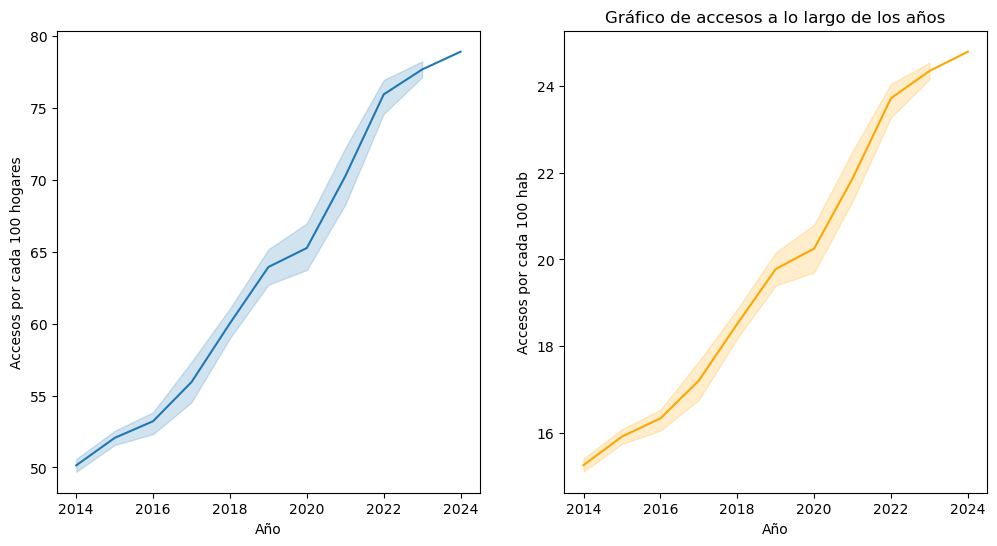

In [692]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.lineplot(x='Año',y='Accesos por cada 100 hogares',data=df_penetrecion_nacional, ax=axes[0])
sns.lineplot(x='Año',y='Accesos por cada 100 hab',data=df_penetrecion_nacional, ax=axes[1], color='orange')
plt.title('Gráfico de accesos a lo largo de los años',loc='center')
plt.show()

En la gráfica se observa que el análisis de acceso a internet por cada 100 hogares como por cada 100 habitantes, tienen la misma pendiente. Incluso son gráficos idénticos.

Pero se nota además que tomando los hogares estaríamos en casi un 80% de hogares, sin embargo tomando en cuenta los habitantes estaríamos casi en un 25%. Pero se evidencia un crecimiento constante en accesos.

Text(0.5, 1.0, 'Grafico de Evolución de accesos por cada 100 habitantes')

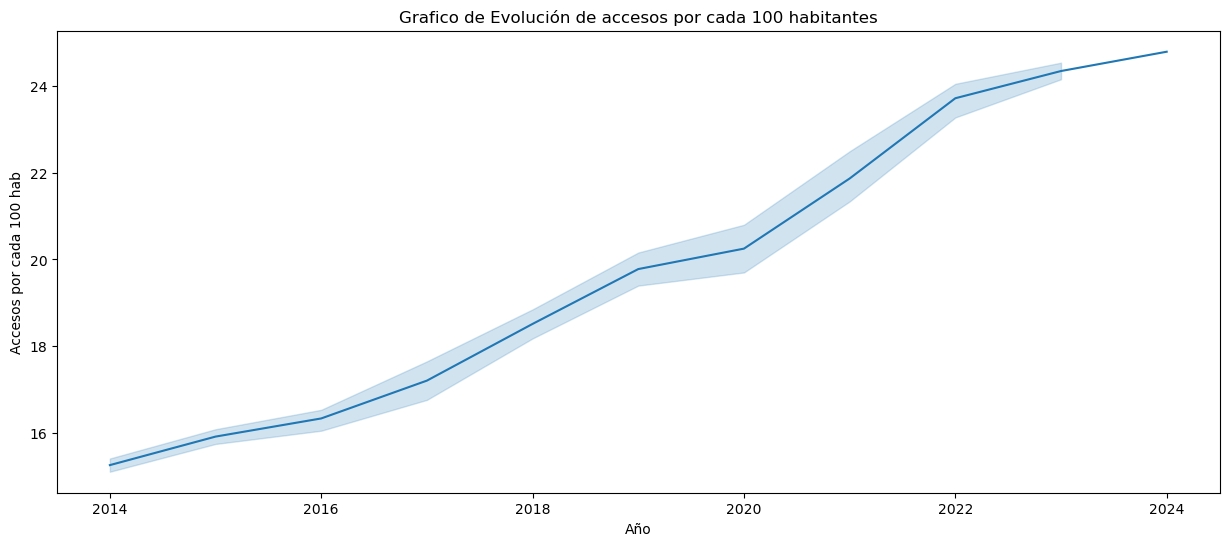

In [693]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Año',y='Accesos por cada 100 hab',data=df_penetrecion_nacional)
plt.title('Grafico de Evolución de accesos por cada 100 habitantes')

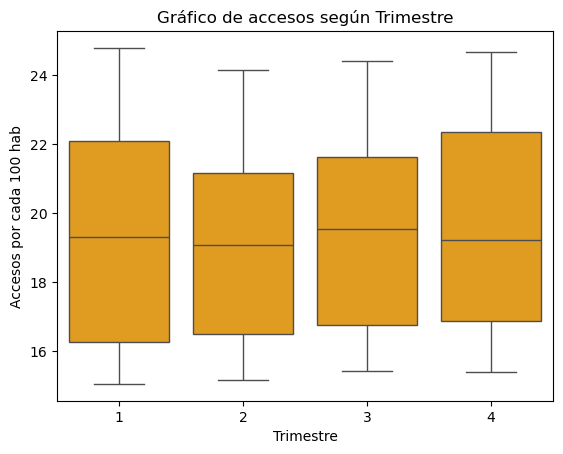

In [694]:
sns.boxplot(x='Trimestre',y='Accesos por cada 100 hab',data=df_penetrecion_nacional, color='orange')
plt.title('Gráfico de accesos según Trimestre',loc='center')
plt.show()

No se observa diferencias entre accesos entre distintos trimestres.

In [695]:
df_penetrecion_nacional.rename(columns={'Accesos por cada 100 hogares':'acc_cien_hogares','Accesos por cada 100 hab':'acc_cien_hab'},inplace=True)

#### df_pen_hogar y df_pen_poblacion

Según lo visto en el caso nacional, se corrige los df de penetración por habitantes y por hogares para compararlos.

In [696]:
df_pen_hogar.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [697]:
df_pen_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [698]:
df_pen_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [699]:
df_pen_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


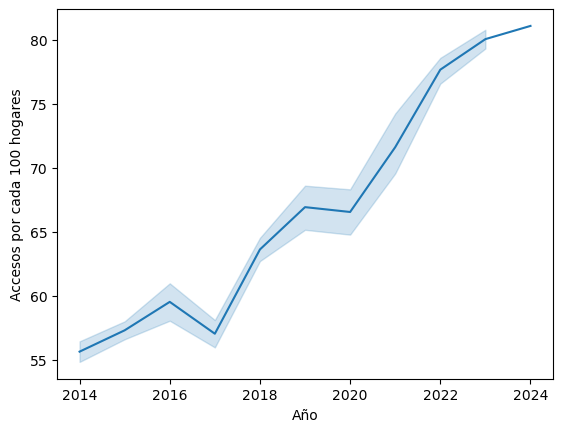

In [700]:
data = df_pen_hogar[df_pen_hogar['Provincia'] == 'Buenos Aires']
sns.lineplot(x='Año', y='Accesos por cada 100 hogares',  data=data)
plt.show()

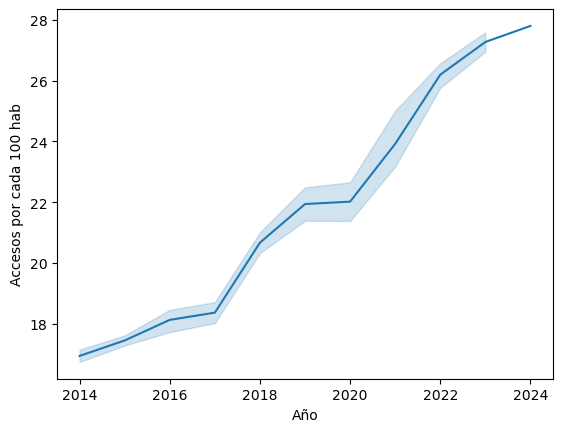

In [701]:
data = df_pen_poblacion[df_pen_poblacion['Provincia'] == 'Buenos Aires']
sns.lineplot(x='Año', y='Accesos por cada 100 hab',  data=data)
plt.show()

En el caso de análisis de penetración por habitantes y por hogares, si bien la tendencia es la misma, existen diferencias para algunos meses entre ambos.

Se revisan a continuación nombres de Provincias

In [702]:
df_pen_hogar['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [703]:
df_pen_poblacion['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [704]:
df_pen_poblacion.rename(columns={'Accesos por cada 100 hab':'pen_c_cien_hab'}, inplace=True)
df_pen_hogar.rename(columns={'Accesos por cada 100 hogares':'pen_c_cien_hog'}, inplace=True)

Se continua con el análisis de los datos relacionados a la penetración cada 100 hogares

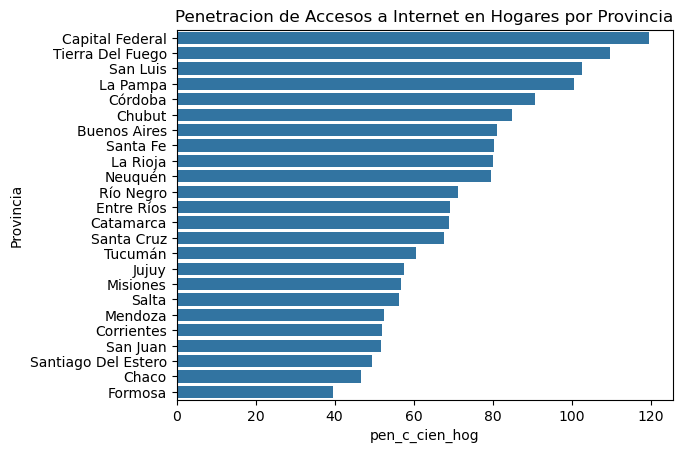

In [705]:
df = df_pen_hogar[df_pen_hogar['Año'] == 2024]
sns.barplot(x='pen_c_cien_hog', y='Provincia', data=df, orient='h', order=df.sort_values('pen_c_cien_hog', ascending=False)['Provincia'])
plt.title('Penetracion de Accesos a Internet en Hogares por Provincia')
plt.show()

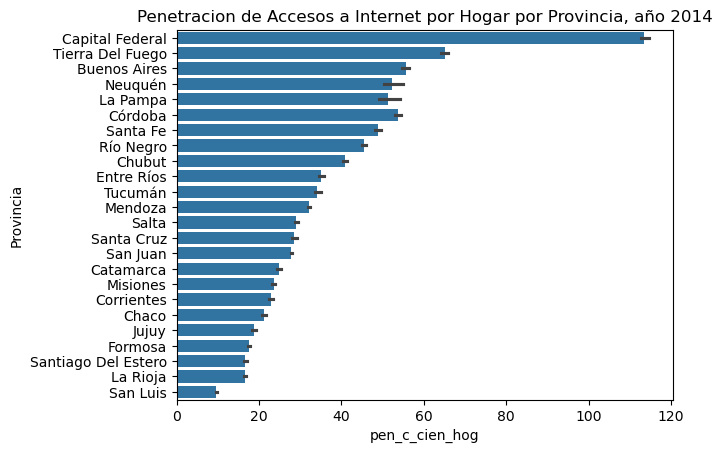

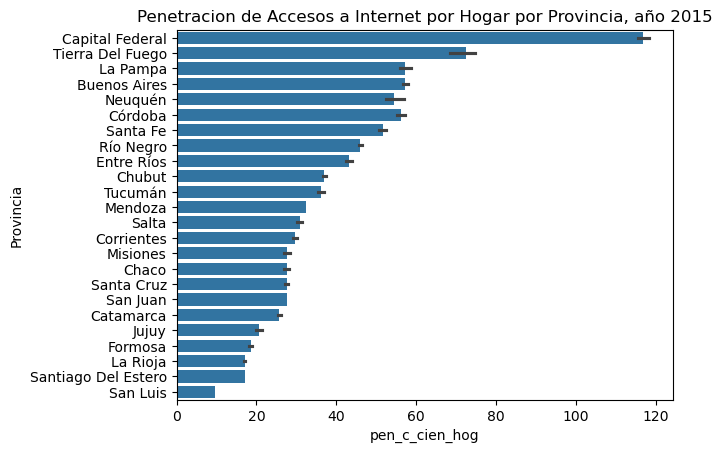

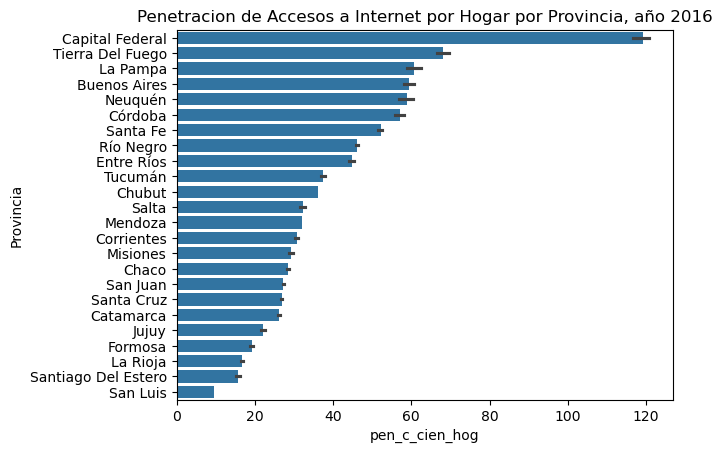

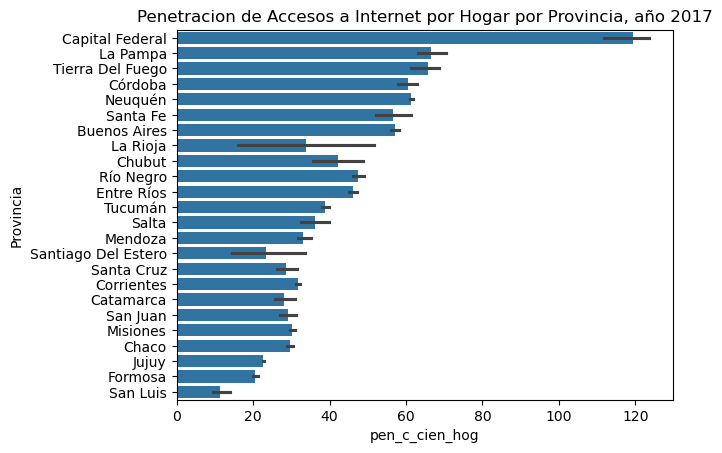

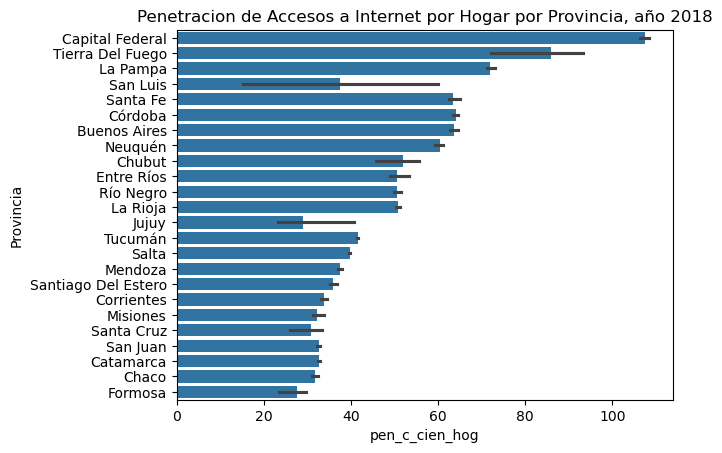

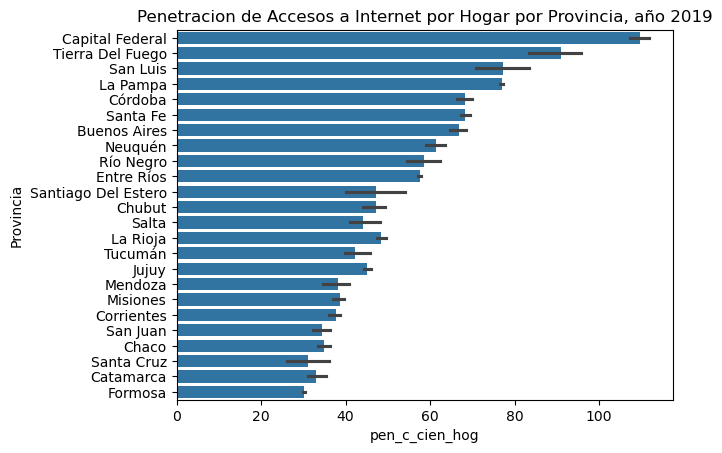

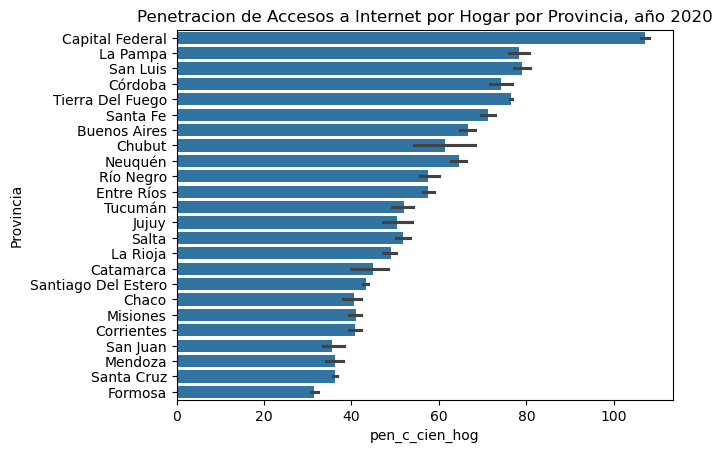

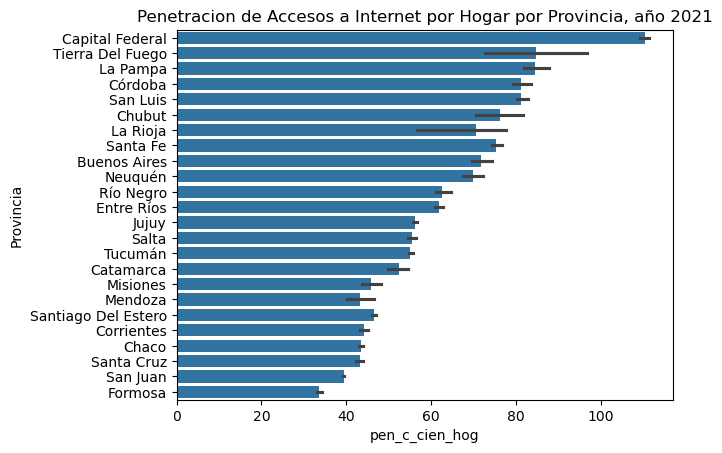

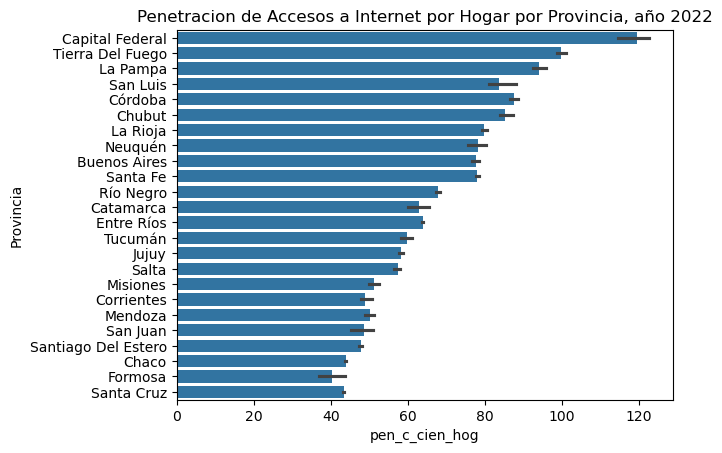

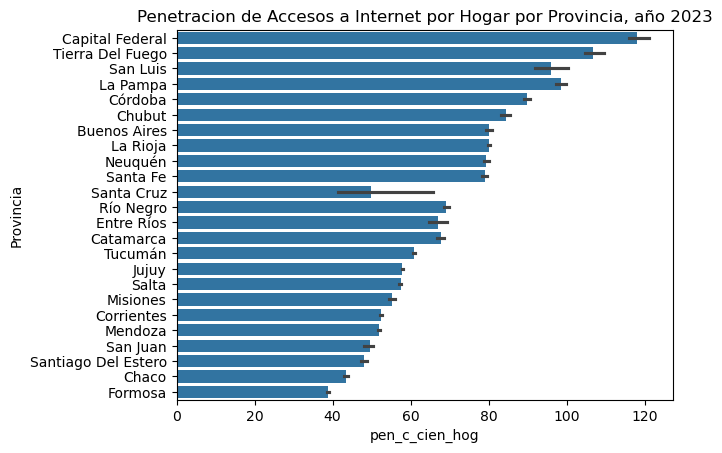

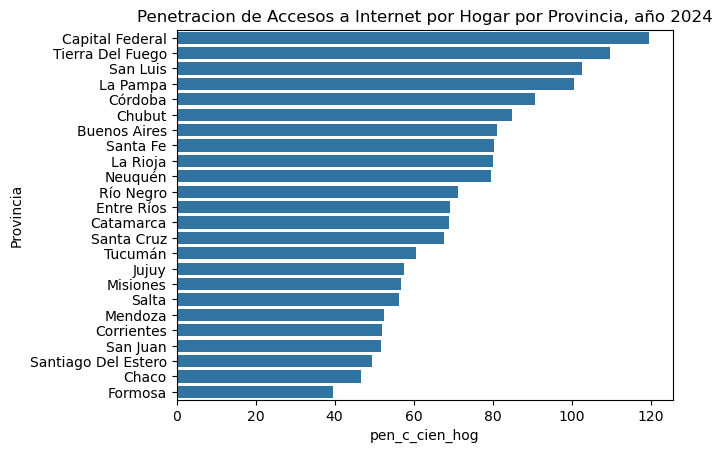

In [706]:
for año in range(2014,2025):
    df = df_pen_hogar[df_pen_hogar['Año'] == año]
    sns.barplot(x='pen_c_cien_hog', y='Provincia', data=df, orient='h', order=df.sort_values('pen_c_cien_hog', ascending=False)['Provincia'])
    plt.title(f'Penetracion de Accesos a Internet por Hogar por Provincia, año %s'% (año))
    plt.show()

En general hay diferencias entre provincias. Se nota una mayor penetración en las provincias del sur. Además hay una marcada diferencia entre penetracion por hogar y habitante, sobre todo en Capital Federal.
En una secuencia de gráficos se observa que la evolución ha sido diferente la lo largo de los años para las distintas provincias. Puede inferirse un mayor desplazamiento de la tecnología hacia las provincias. Mientras en Capital Federal el grado de penetración ya es alto.

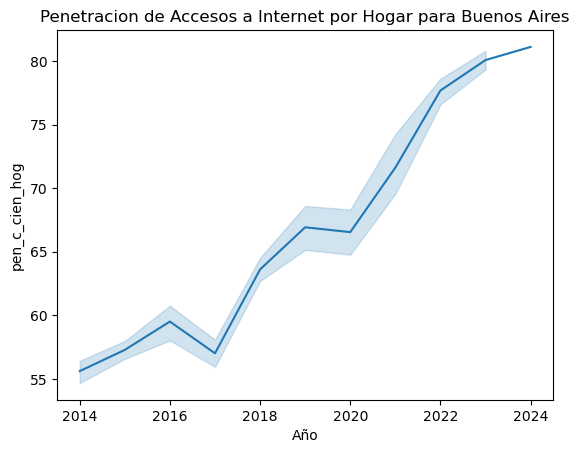

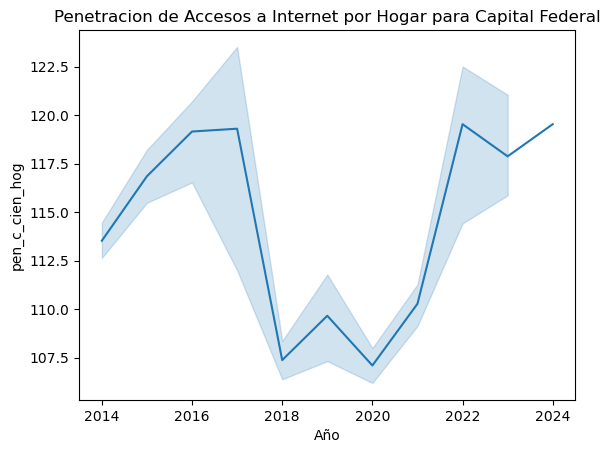

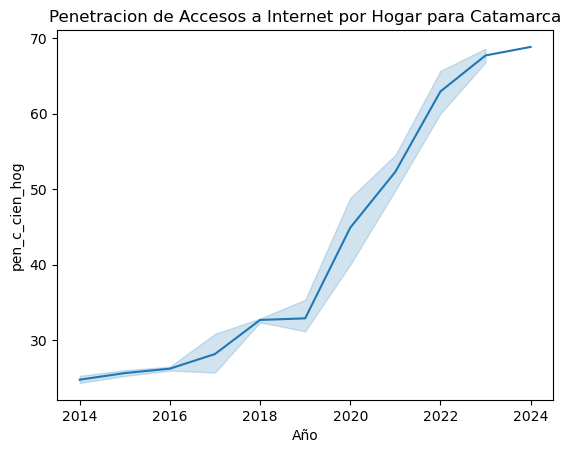

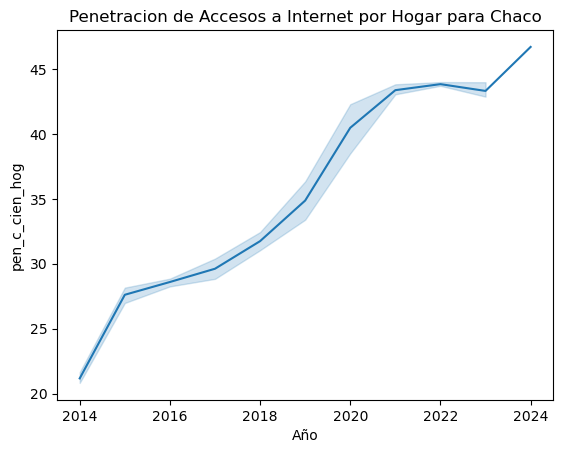

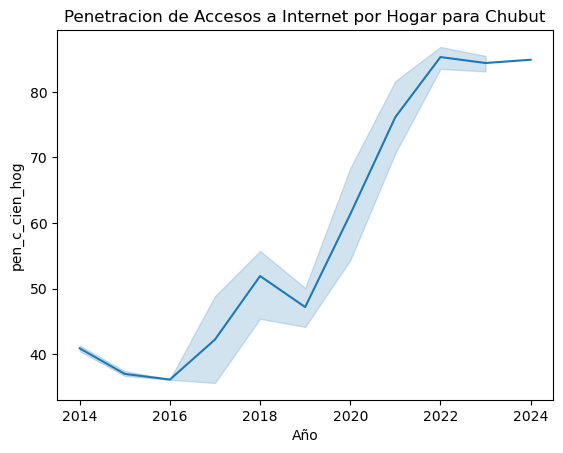

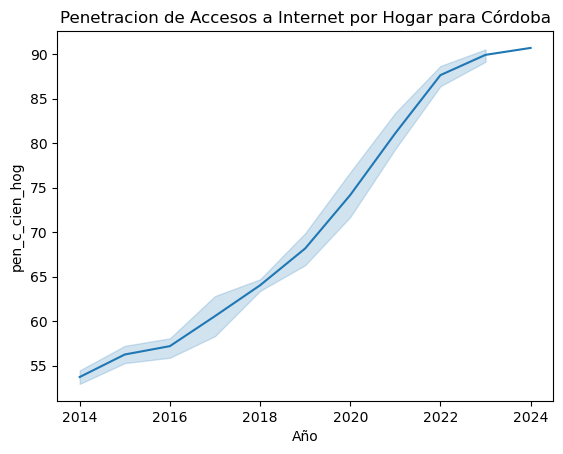

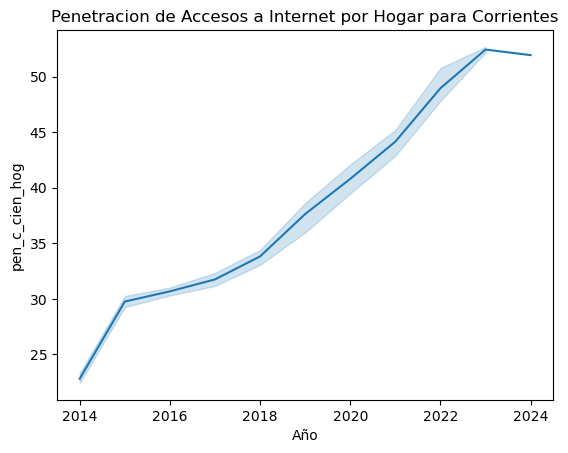

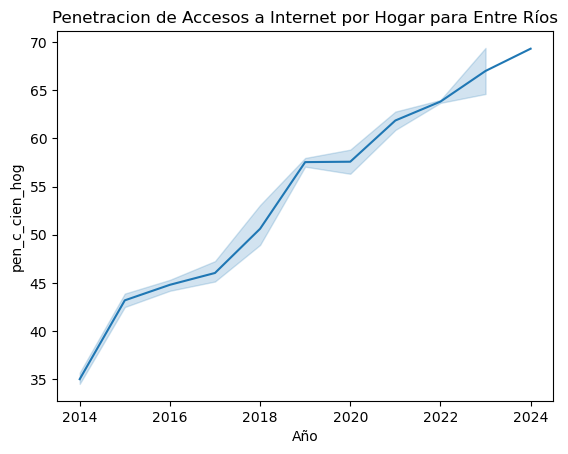

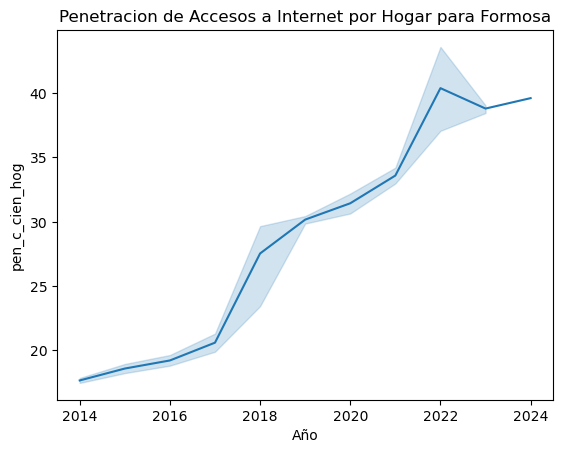

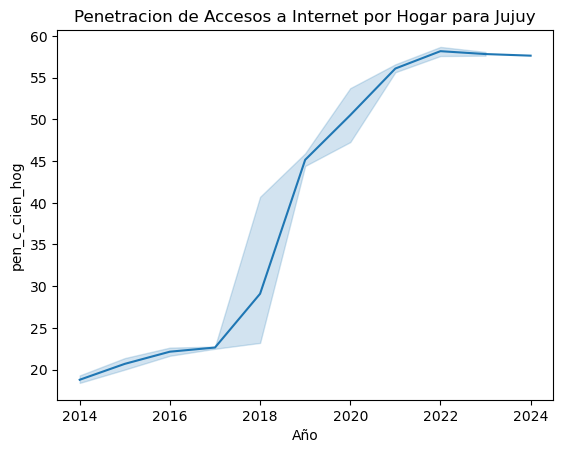

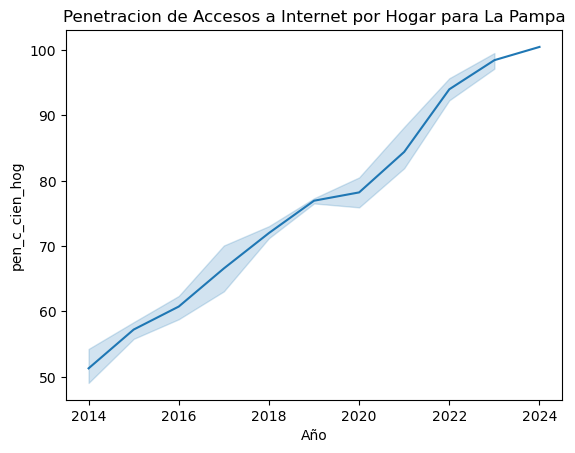

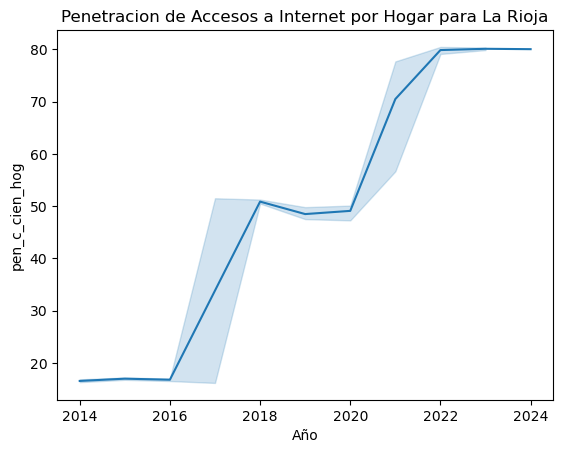

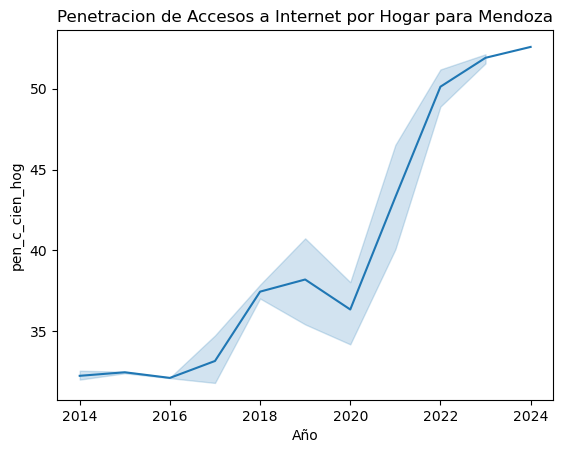

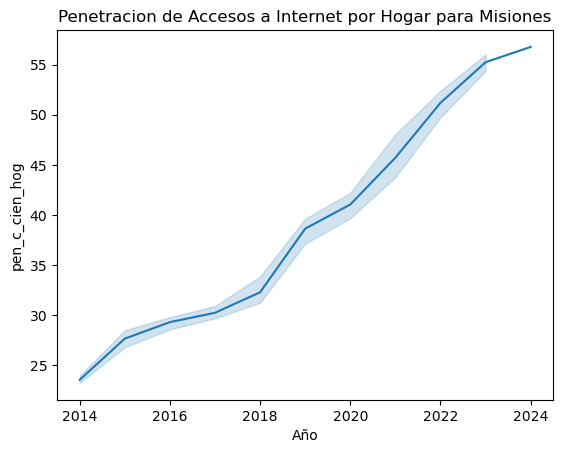

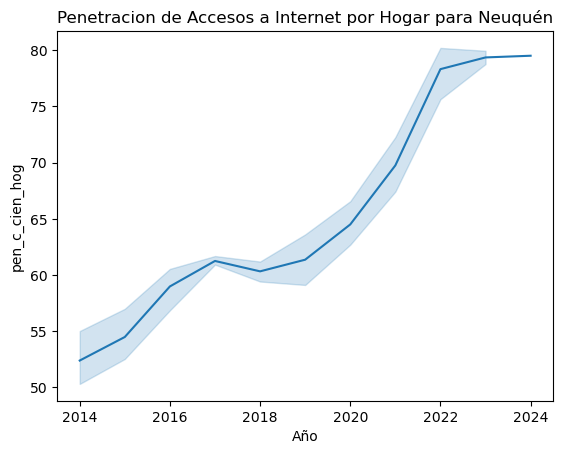

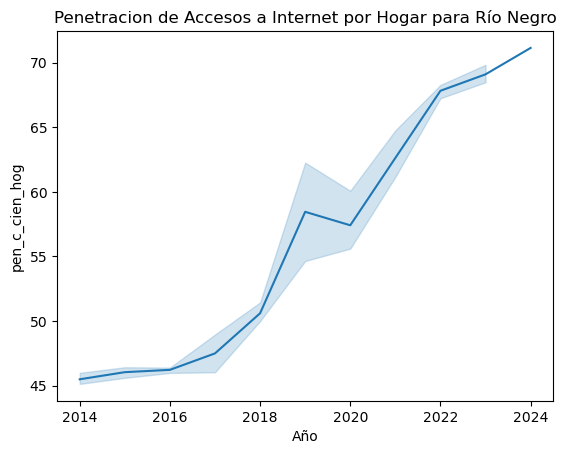

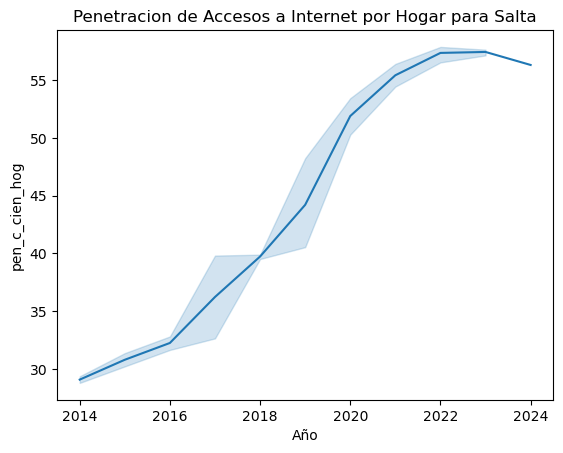

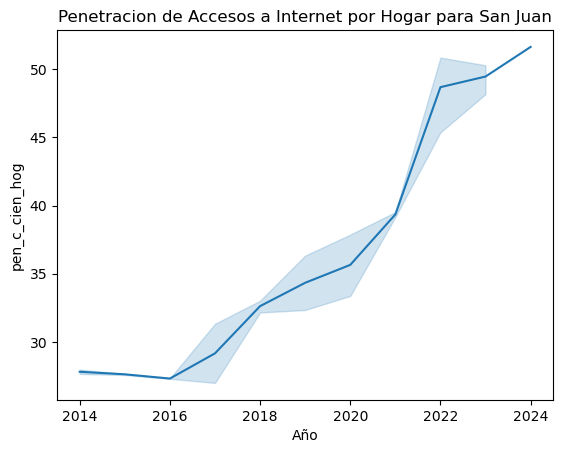

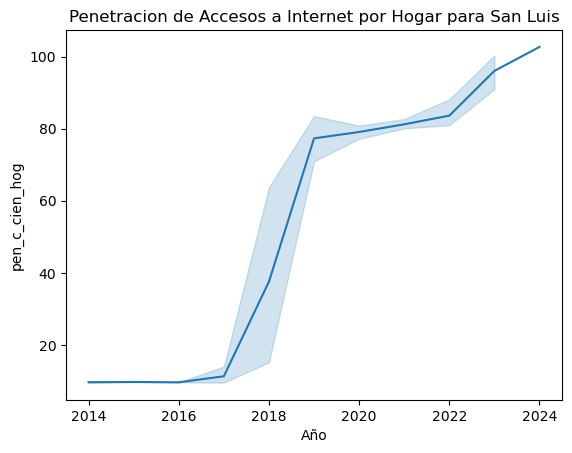

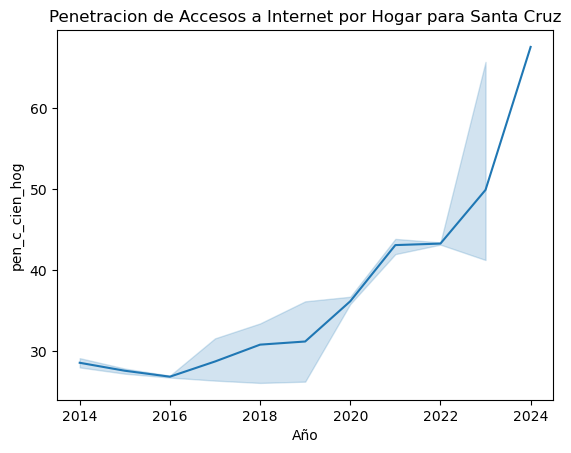

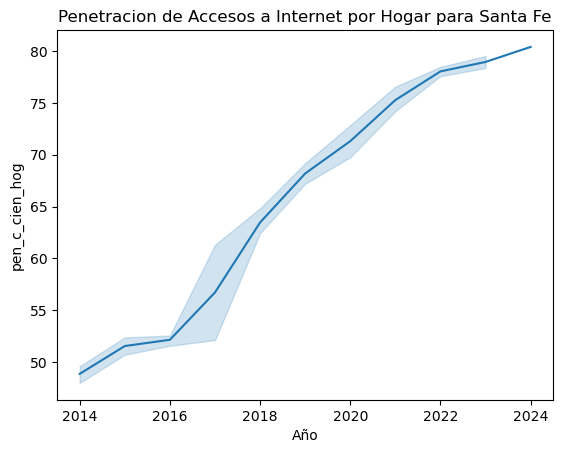

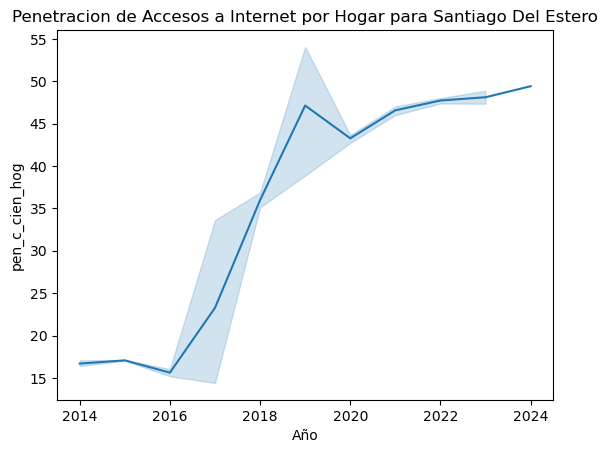

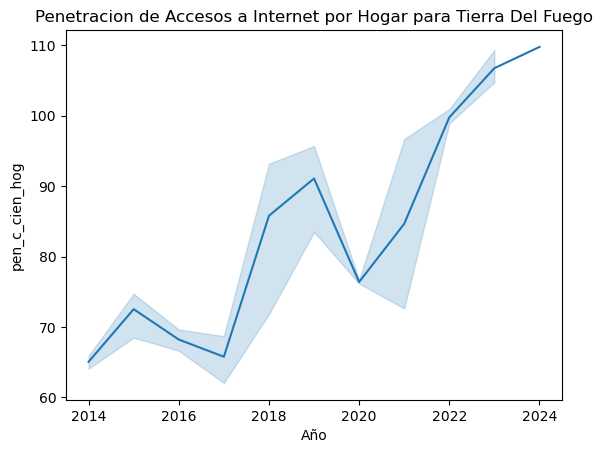

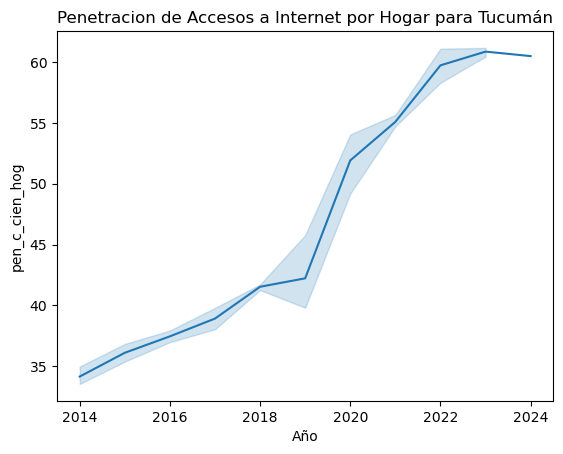

In [707]:
provincias = df_pen_hogar['Provincia'].unique().tolist()
for provincia in provincias:
    df = df_pen_hogar[df_pen_hogar['Provincia'] == provincia]
    sns.lineplot(x='Año', y='pen_c_cien_hog', data=df)
    plt.title(f'Penetracion de Accesos a Internet por Hogar para %s'% (provincia))
    plt.show()

Se puede ver claras diferencias en la evolución a lo largo de los años según la provincia que se trate

#### df Velocidad

En esta parte se analiza la situación del país segun el acceso a distintas velocidades

In [708]:
df_vel_sin_rango.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps,Totales
0,2024.0,1.0,Buenos Aires,125147.0,18.0,0.0,0.0,25815.0,169.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5044557.0
1,2024.0,1.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1504711.0
2,2024.0,1.0,Catamarca,70.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74933.0
3,2024.0,1.0,Chaco,3816.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155543.0
4,2024.0,1.0,Chubut,16640.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170676.0


In [709]:
df_acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


Ambos df tienen la misma información sólo que uno de ellos tiene agrupadas la velocidades en rangos mientras el otro no. Conservamos la información de velocidades sin rangos.

In [710]:
del df_acc_vel

In [711]:
df_vel_sin_rango.dropna(inplace=True)

Se reemplaza datos tipo float por int

In [712]:
columnas_float = df_vel_sin_rango.select_dtypes(include=['float64']).columns
df_vel_sin_rango[columnas_float] = df_vel_sin_rango[columnas_float].astype(int)


In [713]:
df_vel_sin_rango.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 0 to 623
Columns: 194 entries, Año to Totales
dtypes: int64(193), object(1)
memory usage: 950.6+ KB


Para evaluar la velocidad media de descarga por provincia y año, se construirá un nuevo df calculando las  medias de descarga por provincia y año.

Se crea un nuevo df con las columnas de velocidades solamente

In [714]:
suma_velocidades = df_vel_sin_rango.iloc[:,4:193]
suma_velocidades.head()

,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,2 Mbps","1,25 Mbps","1,5 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,18,0,0,25815,169,4611,17899,0,0,141,...,0,0,0,0,0,0,0,0,0,0
1,31,0,0,451,34,1307,4111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,34,37,0,176,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,234,2,0,416,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,69,34,836,247,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se crea una lista nueva convirtiendo los valores de los títulos de cada columna en valores float. Para ello se elimina de cada texto ' Mbps', luego se convierte la ',' en '.'. Y se convierten a float

In [715]:
lista = suma_velocidades.columns
lista_sin_mbps = [velocidad[:-5] for velocidad in lista]
lista = [float(valor.replace(',','.')) for  valor in lista_sin_mbps]

Se multiplican los valores de esta lista con los respectivos valores de cada fila para obtener velocidades ponderadas por la cantidad de accesos.

In [716]:
velocidad_ponderada = suma_velocidades * lista

Se crea una columna con la suma total

In [717]:
velocidad_ponderada['total'] = velocidad_ponderada.sum(axis=1)

/tmp/ipykernel_1514007/24358507.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  velocidad_ponderada['total'] = velocidad_ponderada.sum(axis=1)


Se agraga la columna total de velocidades ponderadas. Y se agrega una columna más para calcular la velocidad media por provincia, año y trimestre. Luego se eliminan las columnas innecesarias.

In [718]:
df_vmd_provincia = df_vel_sin_rango.filter(items=['Año','Trimestre','Provincia','Totales'])
df_vmd_provincia['total_ponderado'] = velocidad_ponderada['total']
df_vmd_provincia.head()

,Año,Trimestre,Provincia,Totales,total_ponderado
0,2024,1,Buenos Aires,5044557,7.828468e+08
1,2024,1,Capital Federal,1504711,3.459979e+08
2,2024,1,Catamarca,74933,6.845876e+06
3,2024,1,Chaco,155543,1.631186e+07
4,2024,1,Chubut,170676,3.158269e+06


In [719]:
df_vmd_provincia['vmd_prov'] = df_vmd_provincia['total_ponderado'] / df_vmd_provincia['Totales'] 

In [720]:
df_vmd_provincia.drop(columns=['Totales','total_ponderado'], inplace=True)
df_vmd_provincia.head()

,Año,Trimestre,Provincia,vmd_prov
0,2024,1,Buenos Aires,155.186431
1,2024,1,Capital Federal,229.943104
2,2024,1,Catamarca,91.359961
3,2024,1,Chaco,104.870438
4,2024,1,Chubut,18.504473


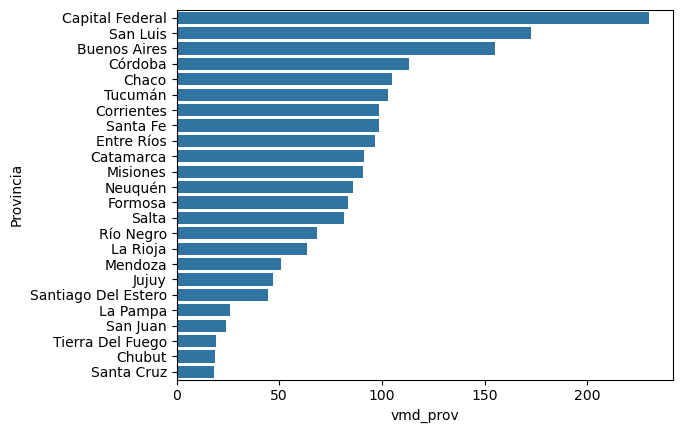

In [721]:
df = df_vmd_provincia[df_vmd_provincia['Año'] == 2024]
sns.barplot(x='vmd_prov', y='Provincia', data=df, orient='h', order=df.sort_values('vmd_prov', ascending=False)['Provincia'])

plt.show()

Se observa que las provincias con más penetración no son exactamente las mismas que tienen las velocidades medias más altas. Por ello se evaluará a continuación la relación que existe con el acceso a la tegnología en las provincias.

#### df_vmd

In [722]:
df_vmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [723]:
df_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.15,Ene-Mar 2024
1,2023,4,139.04,Oct-Dic 2023
2,2023,3,129.67,Jul-Sept 2023
3,2023,2,123.95,Abr-Jun 2023
4,2023,1,110.50,Ene-Mar 2023


Se elimina la columna Trimestre.1 y se cambian nombres de columnas

In [724]:
df_vmd.drop(columns='Trimestre.1',axis=1,inplace=True)
df_vmd.rename(columns={'Año':'año','Trimestre':'id_trimestre','Mbps (Media de bajada)':'vmd'},inplace=True)

Reviso la velocidad media de bajada

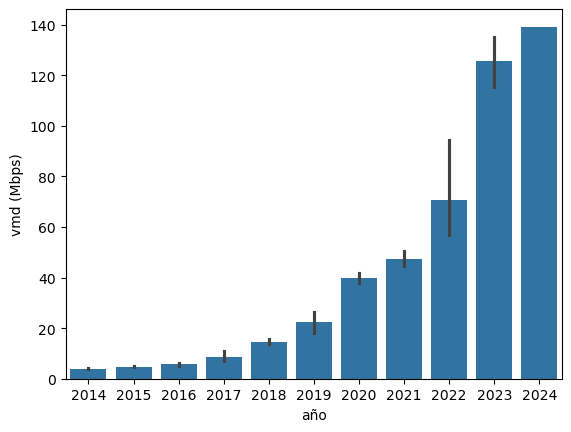

In [725]:
sns.barplot(x='año',y='vmd',data=df_vmd)
plt.ylabel('vmd (Mbps)')
plt.show()

Se observa un importante aumento en la velocidad media de bajada en loś últimos 2 años, por las características de la barra del año 2022 es probable que se haya dado en los últimos trimestres.

Para comprobar creamos otro gráfico que unifique año y trimestre.

In [726]:
df_vmd['año'].dtype

dtype('int64')

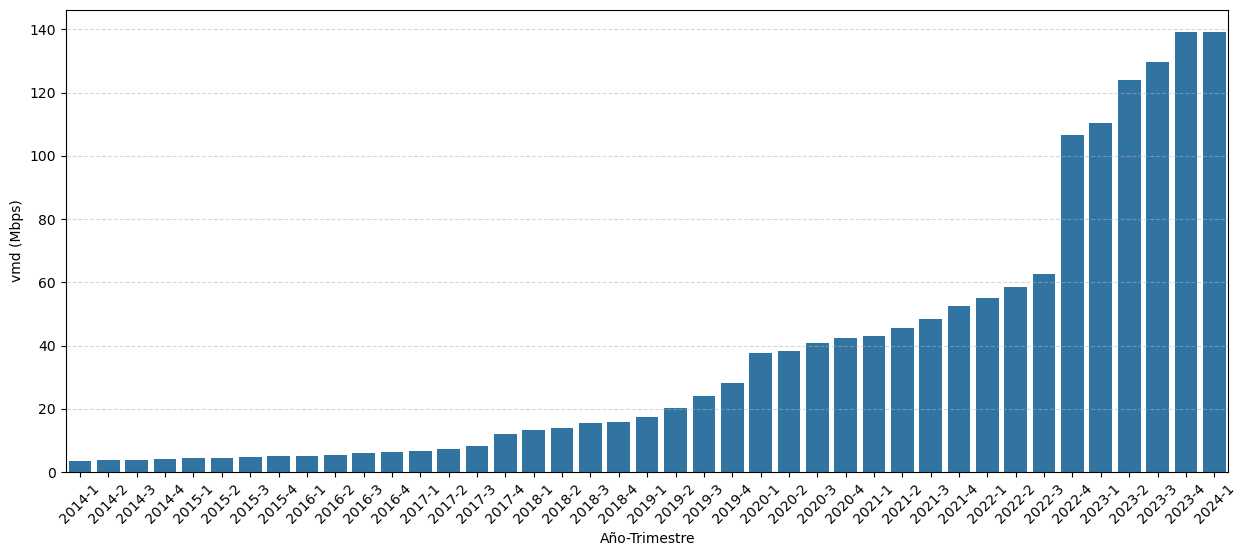

In [727]:
X = df_vmd['año'].astype(str) + '-' + df_vmd['id_trimestre'].astype(str)
plt.figure(figsize=(15,6))
sns.barplot(x=X,y='vmd',data=df_vmd, order=X.unique()[::-1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Año-Trimestre')
plt.ylabel('vmd (Mbps)')
plt.xticks(rotation=45)
plt.show()

Como se observa, desde el 4º trimestre de 2022 se dió un salto significativo en la velocidad media de descarga (vmd). Pasó de aprox. 60 Mbps a casi 110 Mbps. Aunque los últimos 2 trimestres no ha habido cambios importantes.

#### df Acceso a tecnologías

In [728]:
df_acc_tegnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [729]:
df_acc_tegnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


Se borran datos vacíos o nulos

In [730]:
df_acc_tegnologia.dropna(inplace=True)

Se cambian a int los valores float

In [731]:
columnas_float = df_acc_tegnologia.select_dtypes(include=['float64']).columns
df_acc_tegnologia[columnas_float] = df_acc_tegnologia[columnas_float].astype(int)


VErificar los datos de Año

In [732]:
df_acc_tegnologia['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016,
       2015, 2014], dtype=object)

Eliminar asteriscos de los años

In [733]:
df_acc_tegnologia['Año'] = df_acc_tegnologia['Año'].replace('2019 *', 2019)

In [734]:
df_acc_tegnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           984 non-null    int64 
 1   Trimestre     984 non-null    object
 2   Provincia     984 non-null    object
 3   ADSL          984 non-null    int64 
 4   Cablemodem    984 non-null    int64 
 5   Fibra óptica  984 non-null    int64 
 6   Wireless      984 non-null    int64 
 7   Otros         984 non-null    int64 
 8   Total         984 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 76.9+ KB


Procedemos de igual manera para Trimestre

In [735]:
df_acc_tegnologia['Trimestre'].unique()

array([1, 4, 3, 2, '3 *', '2 *', '1 *'], dtype=object)

In [736]:
df_acc_tegnologia['Trimestre'] = df_acc_tegnologia['Trimestre'].replace('1 *', 1).infer_objects(copy=False)
df_acc_tegnologia['Trimestre'] = df_acc_tegnologia['Trimestre'].replace('2 *', 2).infer_objects(copy=False)
df_acc_tegnologia['Trimestre'] = df_acc_tegnologia['Trimestre'].replace('3 *', 3).infer_objects(copy=False)

In [737]:
df_acc_tegnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           984 non-null    int64 
 1   Trimestre     984 non-null    int64 
 2   Provincia     984 non-null    object
 3   ADSL          984 non-null    int64 
 4   Cablemodem    984 non-null    int64 
 5   Fibra óptica  984 non-null    int64 
 6   Wireless      984 non-null    int64 
 7   Otros         984 non-null    int64 
 8   Total         984 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 76.9+ KB


Analizamos la evolución a nivel nacional de las distintas tecnologías

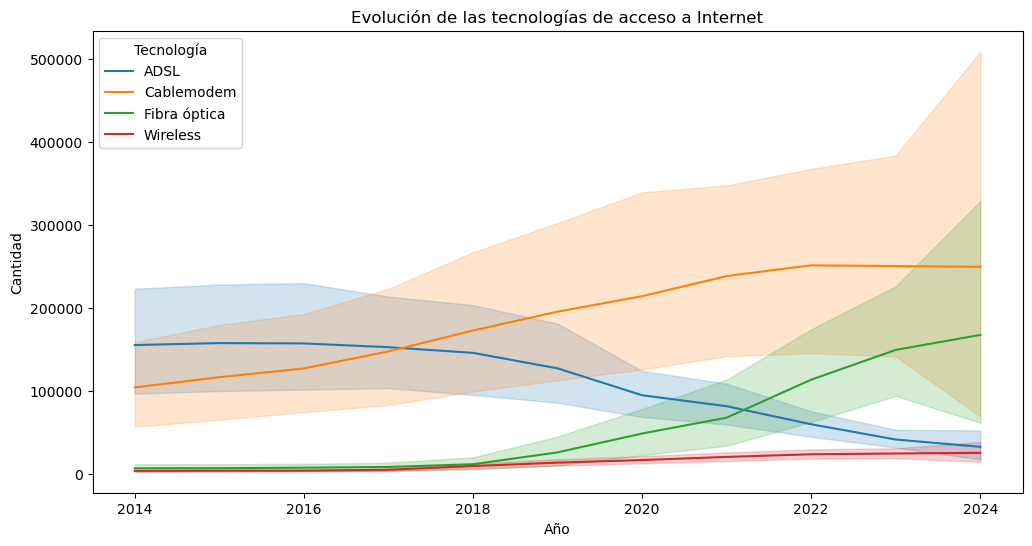

In [738]:
df_melted = pd.melt(df_acc_tegnologia, id_vars=['Año', 'Trimestre'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'], var_name='Tecnología', value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Año', y='Cantidad', hue='Tecnología')

plt.title('Evolución de las tecnologías de acceso a Internet')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tecnología')

plt.show()

<Axes: xlabel='Año', ylabel='Wireless'>

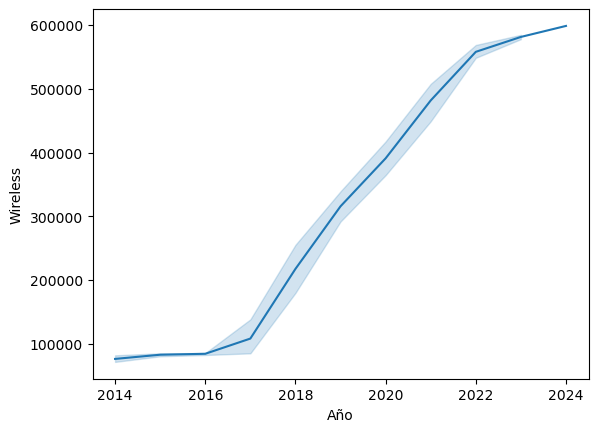

In [739]:
df_tec_nac = df_acc_tegnologia.groupby(['Año','Trimestre']).sum()
sns.lineplot(df_tec_nac, x='Año', y='Wireless')

<Axes: xlabel='Año', ylabel='Cablemodem'>

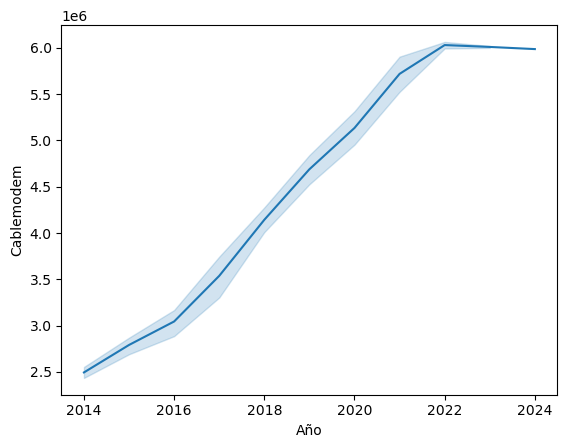

In [740]:
sns.lineplot(df_tec_nac, x='Año', y='Cablemodem')

Analizamos la distribucion de tecnologías por provincias, para distintos años

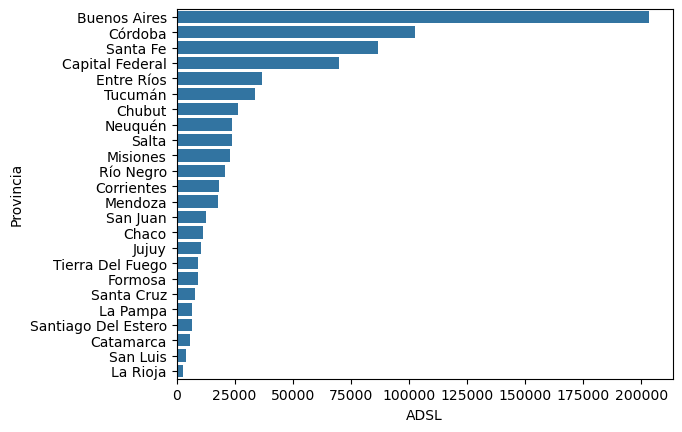

In [741]:
df = df_acc_tegnologia[df_acc_tegnologia['Año'] == 2024]
sns.barplot(x='ADSL', y='Provincia', data=df, orient='h', order=df.sort_values('ADSL', ascending=False)['Provincia'])

plt.show()

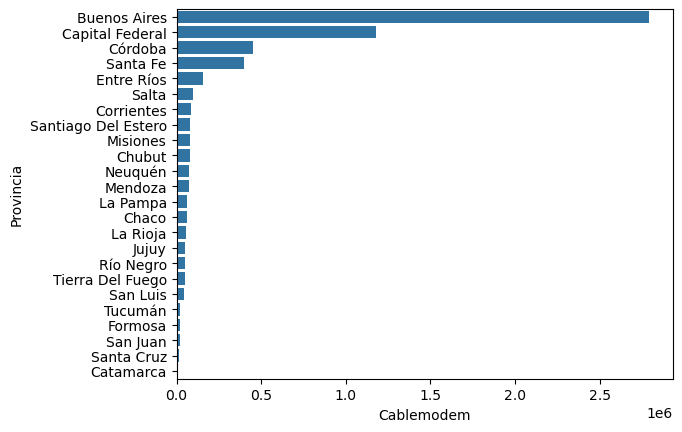

In [742]:
df = df_acc_tegnologia[df_acc_tegnologia['Año'] == 2024]
sns.barplot(x='Cablemodem', y='Provincia', data=df, orient='h', order=df.sort_values('Cablemodem', ascending=False)['Provincia'])

plt.show()

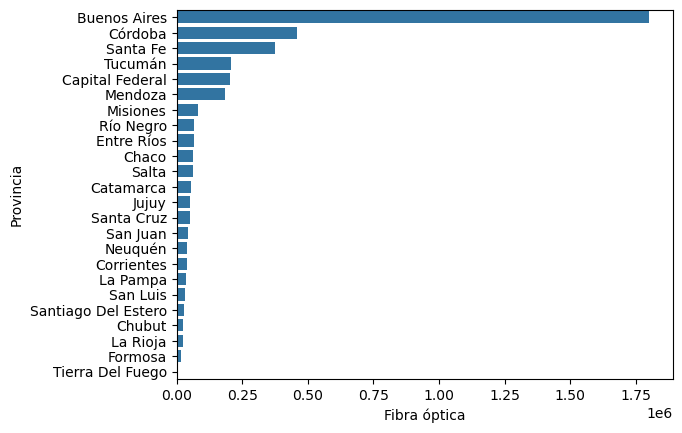

In [743]:
df = df_acc_tegnologia[df_acc_tegnologia['Año'] == 2024]
sns.barplot(x='Fibra óptica', y='Provincia', data=df, orient='h', order=df.sort_values('Fibra óptica', ascending=False)['Provincia'])

plt.show()

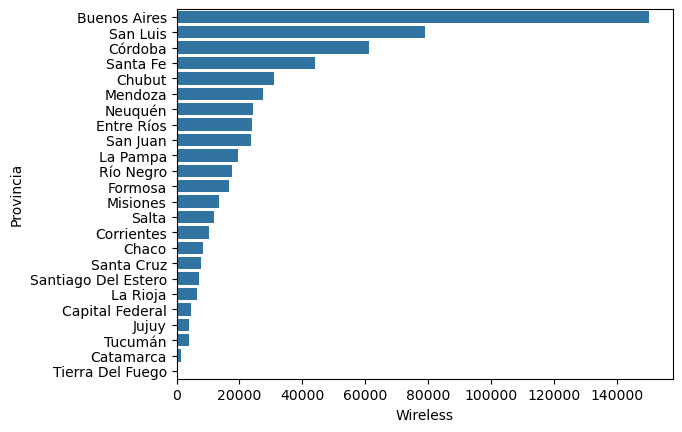

In [744]:
df = df_acc_tegnologia[df_acc_tegnologia['Año'] == 2024]
sns.barplot(x='Wireless', y='Provincia', data=df, orient='h', order=df.sort_values('Wireless', ascending=False)['Provincia'])

plt.show()

<Axes: xlabel='Año', ylabel='Wireless'>

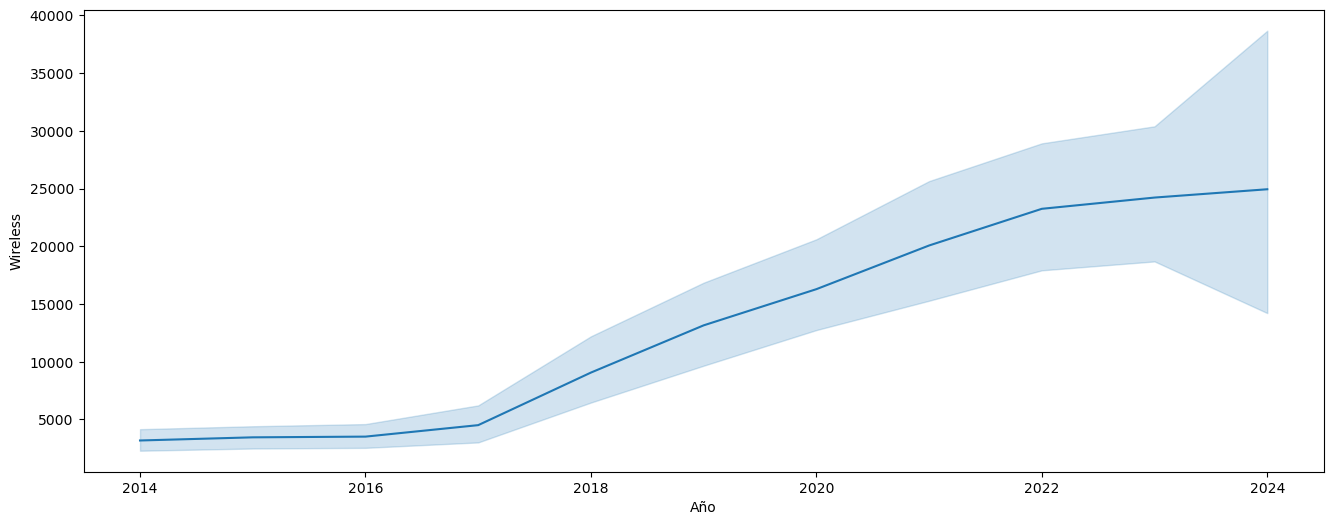

In [745]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_acc_tegnologia,x='Año', y='Wireless')

Se observa que se ha incrementado el acceso a través de wireless, algo que puede ser interesante por representar una tegnología de bajo coste de instalación.

Observando los cuadros se puede ver que ADSL y Cablemodem son tegnologías concentradas en Buenos Aires, Capital Federal, Santa Fe y Córdoba. Incluso la fibra óptica.

También se observa que las provincias del sur que tienen una alta penetración, no tienen velocidades medias muy altas ni acceso a tecnologías más rápidas.

In [746]:
df_acc_tegnologia.drop(columns='Otros',  inplace=True)

In [747]:
df_acc_tegnologia.rename(columns={'Fibra óptica' : 'Fibra_óptica'}, inplace=True)

#### Mapa de conectividad

In [749]:
df_conect = pd.read_excel('./datasets/mapa_conectividad.xlsx')

In [750]:
df_conect.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


In [751]:
df_conect.replace('--', 0, inplace=True)
df_conect.replace('SI', 1, inplace=True)
df_conect.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,1,1,0,0,1,1,1,1,1,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,0,0,0,0,0,0,1,0,0,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,1,0,0,0,1,0,0,1,0,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,1,0,0,0,0,0,1,0,0,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,0,0,0,0,0,1,0,0,0,6854040.0,-35.164397,-60.081358


In [798]:
df_connect_prov = df_conect.groupby('Provincia').sum(numeric_only=True).reset_index()
df_connect_prov.drop(['Link','Latitud','Longitud'], axis=1, inplace=True)
df_connect_prov.head()

,Provincia,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G
0,BUENOS AIRES,14911542,350,341,213,471,147,514,551,607,611
1,CABA,2890151,48,48,48,48,48,48,48,48,48
2,CATAMARCA,343343,14,2,1,29,47,34,29,29,48
3,CHACO,927414,28,16,1,47,42,47,47,44,61
4,CHUBUT,490554,14,10,15,14,46,31,54,38,38


<Axes: xlabel='None', ylabel='Provincia'>

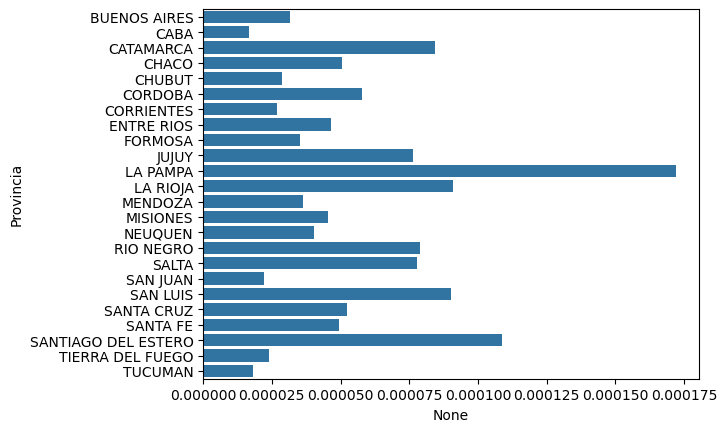

In [802]:

sns.barplot(data=df_connect_prov, x=df_connect_prov['Fibra óptica']/df_connect_prov['Población'], y='Provincia', orient='h')

In [806]:
df_connect_prov[df_connect_prov['Provincia']=='LA PAMPA']

,Provincia,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G
10,LA PAMPA,302570,11,17,13,52,60,68,69,35,49


In [808]:
df_acc_tegnologia[df_acc_tegnologia['Provincia'] == 'La Pampa']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_óptica,Wireless,Total,kpi_3
410,2024,1,La Pampa,6844,59008,35556,19681,122195,NaN
411,2023,4,La Pampa,6844,59063,34331,19982,121326,3.568204
412,2023,3,La Pampa,6844,59063,32891,20014,119921,4.378097
413,2023,2,La Pampa,7254,59101,31449,19993,118910,4.585201
414,2023,1,La Pampa,7049,59944,28126,20103,116504,11.814691
415,2022,4,La Pampa,7785,60566,24552,19995,114164,14.556859
416,2022,3,La Pampa,7796,60078,23551,20216,116092,4.250350
417,2022,2,La Pampa,7796,59273,22994,20200,111527,2.422371
418,2022,1,La Pampa,8003,58978,21739,19903,109732,5.773035
419,2021,4,La Pampa,8175,58000,20192,19286,107007,7.661450


Se observan provincias como La Pampa con muchas localidades con acceso a Fibra óptica. Pero con un bajo nivel de accesos por habitantes de esta tecnología

### <span style="color:orange"><br><hr>KPI's</span>

En este apartado trabajaremos sobre la construcción de los KPI's.

### Aumentar 2% el acceso a internet

Se pretende aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

_KPI_ = ((Nuevoacceso - Accesoactual)/ Accesoactual)* 100

Donde:

- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [752]:
df_pen_hogar.head()

,Año,Trimestre,Provincia,pen_c_cien_hog
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


Se genera un nuevo objeto para almacenar los nombres de las provincias

In [753]:
provincias = df_pen_hogar['Provincia'].unique()

Se genera un diccionario con los df nuevo para cada provincia, filtrando el df original por provincias según la lista generada

In [754]:
dic_provincias = {}

for provincia in provincias:
    dic_provincias[provincia] = df_pen_hogar[df_pen_hogar['Provincia'] == provincia]


dic_provincias.keys()

dict_keys(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'])

Reindexamos los df de cada provincia para después calcular el KPI

In [755]:
for provincia in provincias:
    dic_provincias[provincia].reset_index(drop=True, inplace=True)

In [756]:
dic_provincias['Buenos Aires'].head()


,Año,Trimestre,Provincia,pen_c_cien_hog
0,2024,1,Buenos Aires,81.10
1,2023,4,Buenos Aires,80.96
2,2023,3,Buenos Aires,80.64
3,2023,2,Buenos Aires,79.67
4,2023,1,Buenos Aires,79.00


Cálculo del KPI para cada Provincia

In [757]:
for provincia in provincias:
    df_prov = dic_provincias[provincia].copy()
    df_prov.loc[:, 'kpi_1'] = (df_prov['pen_c_cien_hog'].shift(1) - df_prov['pen_c_cien_hog']) / df_prov['pen_c_cien_hog'] * 100
    dic_provincias[provincia] = df_prov

In [758]:
dic_provincias['Buenos Aires'].head()

,Año,Trimestre,Provincia,pen_c_cien_hog,kpi_1
0,2024,1,Buenos Aires,81.10,NaN
1,2023,4,Buenos Aires,80.96,0.172925
2,2023,3,Buenos Aires,80.64,0.396825
3,2023,2,Buenos Aires,79.67,1.217522
4,2023,1,Buenos Aires,79.00,0.848101


In [759]:
df_pen_hogar = pd.concat(dic_provincias.values(), ignore_index=True)
df_pen_hogar.sample(10)

,Año,Trimestre,Provincia,pen_c_cien_hog,kpi_1
215,2021,3,Córdoba,81.284567,3.967361
637,2018,3,Río Negro,50.542648,2.609193
440,2016,3,La Pampa,61.731785,2.080609
301,2020,3,Entre Ríos,58.190164,2.206804
699,2023,3,San Juan,50.450000,-0.733399
247,2023,4,Corrientes,52.560000,-1.179604
513,2018,4,Mendoza,37.757784,-0.266485
146,2018,2,Chaco,31.251705,3.300287
759,2018,4,San Luis,67.550454,-0.314604
465,2020,3,La Rioja,50.118113,-0.014967


Controlamos la evolución del KPI en Buenos Aires

<Axes: xlabel='kpi_1', ylabel='None'>

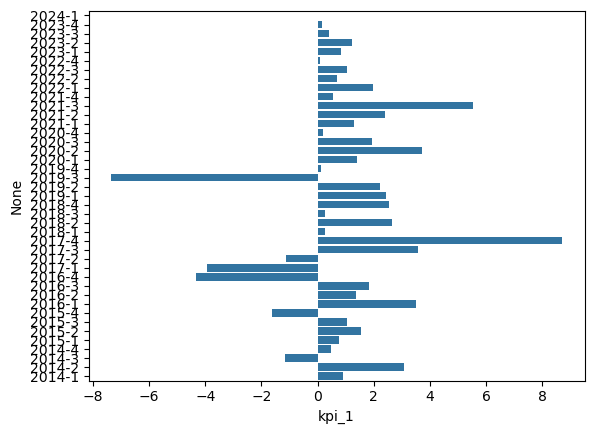

In [760]:
mask = df_pen_hogar['Provincia'] == 'Buenos Aires'
data = df_pen_hogar[mask]
X = data['Año'].astype(str)+ '-' + data['Trimestre'].astype(str)

sns.barplot(x=data['kpi_1'], y=X, data=data, orient='h')


### Aumentar 3% la velocidad media de bajada

Se pretende aumentar en un 3% la velocidad media de bajada, para el próximo trimestre, por provincia. La fórmula es la siguiente:

_KPI_ = ((vmd_nuevo - vmd_actual)/ vmd_actual)* 100

Donde:

- vmd_nuevo se refiere a la velocidad media de bajada del próximo trimestre.
- vmd_actual se refiere a la velocidad media de bajada en el trimestre actual.

Se crea el diccionario de dfs

In [761]:
dic_provincias = {}

for provincia in provincias:
    dic_provincias[provincia] = df_vmd_provincia[df_vmd_provincia['Provincia'] == provincia]


dic_provincias.keys()

dict_keys(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'])

Reindexado

In [762]:
for provincia in provincias:
    dic_provincias[provincia].reset_index(drop=True, inplace=True)

In [763]:
dic_provincias['Buenos Aires'].head()

,Año,Trimestre,Provincia,vmd_prov
0,2024,1,Buenos Aires,155.186431
1,2023,4,Buenos Aires,155.533470
2,2023,3,Buenos Aires,143.208664
3,2023,2,Buenos Aires,155.182083
4,2023,1,Buenos Aires,113.877665


In [764]:
for provincia in provincias:
    df_prov = dic_provincias[provincia].copy()
    df_prov.loc[:, 'kpi_2'] = (df_prov['vmd_prov'].shift(1) - df_prov['vmd_prov']) / df_prov['vmd_prov'] * 100
    dic_provincias[provincia] = df_prov

In [765]:
dic_provincias['Buenos Aires'].head()

,Año,Trimestre,Provincia,vmd_prov,kpi_2
0,2024,1,Buenos Aires,155.186431,NaN
1,2023,4,Buenos Aires,155.533470,-0.223128
2,2023,3,Buenos Aires,143.208664,8.606187
3,2023,2,Buenos Aires,155.182083,-7.715722
4,2023,1,Buenos Aires,113.877665,36.270868


Unir el diccionario de dfs en un solo df

In [766]:
df_vmd = pd.concat(dic_provincias.values(), ignore_index=True)
df_vmd.sample(10)

,Año,Trimestre,Provincia,vmd_prov,kpi_2
432,2020,1,Salta,20.616595,5.399230
42,2020,1,Capital Federal,58.705683,2.977926
99,2018,4,Chaco,13.656769,-2.508639
17,2019,4,Buenos Aires,30.597109,46.516261
501,2022,2,Santa Cruz,11.651104,56.920689
104,2024,1,Chubut,18.504473,NaN
560,2020,3,Santiago Del Estero,10.383907,4.632460
145,2020,2,Córdoba,30.655240,7.838438
376,2021,1,Neuquén,32.758822,5.728148
151,2018,4,Córdoba,15.626711,-0.200009


Gráfico

Text(0.5, 1.0, 'KPI 2')

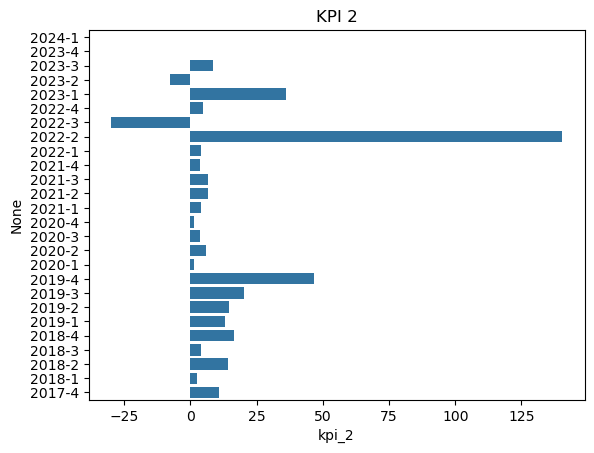

In [767]:
mask = df_vmd['Provincia'] == 'Buenos Aires'
data = df_vmd[mask]
X = data['Año'].astype(str)+ '-' + data['Trimestre'].astype(str)

sns.barplot(x=data['kpi_2'], y=X, data=data, orient='h')
plt.title('KPI 2')


Text(0.5, 1.0, 'KPI 2')

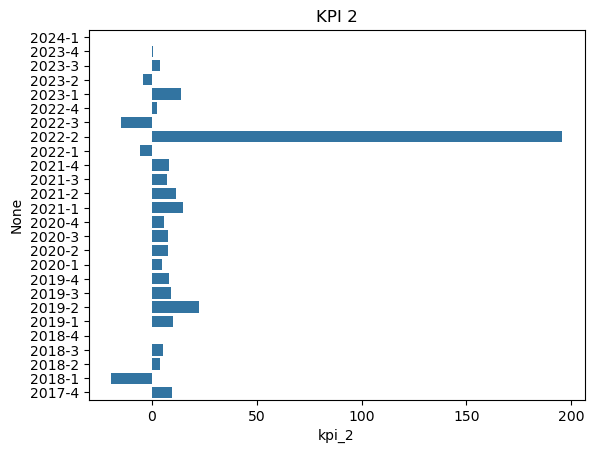

In [768]:
mask = df_vmd['Provincia'] == 'Formosa'
data = df_vmd[mask]
X = data['Año'].astype(str)+ '-' + data['Trimestre'].astype(str)

sns.barplot(x=data['kpi_2'], y=X, data=data, orient='h')
plt.title('KPI 2')

In [769]:
df_vmd[df_vmd['Provincia']== 'Formosa']

,Año,Trimestre,Provincia,vmd_prov,kpi_2
208,2024,1,Formosa,83.396787,NaN
209,2023,4,Formosa,82.877837,0.626162
210,2023,3,Formosa,79.818796,3.832482
211,2023,2,Formosa,83.396787,-4.290322
212,2023,1,Formosa,73.113133,14.065399
213,2022,4,Formosa,71.221255,2.656339
214,2022,3,Formosa,83.396787,-14.599521
215,2022,2,Formosa,28.218324,195.541244
216,2022,1,Formosa,29.952575,-5.789989
217,2021,4,Formosa,27.703547,8.118198


Aumentar la velocidad media de bajada en cada provincia será un análisis particular en cada caso. Ya que dependerá de la situación de cada provincia para  poder aumentar la velocidad media de bajada. Por ejemplo, en las provincias con una velocidad media alta, será  más difícil aumentar, mientras que en las provincias con una velocidad media más baja.

### Aumentar un 5% los accesos a internet via Fibra Óptica

Se pretende aumentar en un 5% los acceso de fibra óptica, para el próximo trimestre, por provincia. La fórmula es la siguiente:

_KPI_ = ((fibra_nuevo - fibra_actual)/ fibra_actual)* 100

Donde:

- fibra_nuevo se refiere los accesos de fibra óptica del próximo trimestre.
- fibra_actual se refiere a los accesos de fibra óptica en el trimestre actual.

In [770]:
dic_provincias = {}

for provincia in provincias:
    dic_provincias[provincia] = df_acc_tegnologia[df_acc_tegnologia['Provincia'] == provincia]


dic_provincias.keys()

dict_keys(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'])

In [771]:
df_acc_tegnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_óptica,Wireless,Total
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,5044557
1,2024,1,Capital Federal,70108,1177475,203756,4493,1504711
2,2024,1,Catamarca,5901,11025,56542,1384,74933
3,2024,1,Chaco,11343,58929,64463,8404,155543
4,2024,1,Chubut,26306,77217,26356,30867,170676


In [772]:
for provincia in provincias:
    df_prov = dic_provincias[provincia].copy()
    df_prov.loc[:, 'kpi_3'] = (df_prov['Fibra_óptica'].shift(1) - df_prov['Fibra_óptica']) / df_prov['Fibra_óptica'] * 100
    dic_provincias[provincia] = df_prov

In [773]:
dic_provincias['Buenos Aires'].head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_óptica,Wireless,Total,kpi_3
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,5044557,NaN
24,2023,4,Buenos Aires,223391,2797700,1784593,137993,5011620,0.808027
48,2023,3,Buenos Aires,237705,2784175,1740239,137921,4968237,2.548730
72,2023,2,Buenos Aires,265537,2766463,1645945,138405,4885488,5.728867
96,2023,1,Buenos Aires,304583,2761043,1551074,132458,4820928,6.116472


In [774]:
df_acc_tegnologia = pd.concat(dic_provincias.values(), ignore_index=True)
df_acc_tegnologia.sample(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_óptica,Wireless,Total,kpi_3
148,2017,4,Chaco,55035,39690,389,380,96615,-1.542416
313,2017,3,Entre Ríos,107774,69596,1786,6245,185464,6.047032
843,2018,2,Santa Fe,337934,304349,11354,15801,684552,3.478950
889,2017,1,Santiago Del Estero,29616,3900,19,911,34475,0.000000
948,2022,4,Tucumán,69441,20668,168717,4069,263422,7.266014
711,2020,3,San Juan,40092,9223,5509,14023,77327,19.785805
516,2018,1,Mendoza,152931,36872,3086,6206,200947,-0.064809
374,2022,4,Jujuy,17880,52390,42626,4067,118218,8.551119
264,2019,3,Corrientes,53344,50230,1888,2458,112759,6.038136
959,2020,1,Tucumán,143184,10494,44687,1355,200067,23.346835


Text(0.5, 1.0, 'KPI 2')

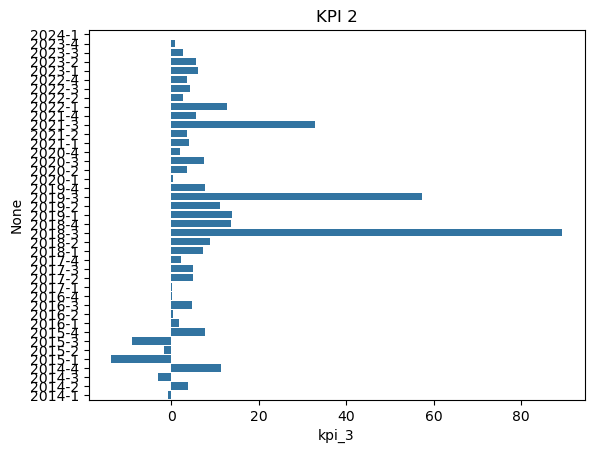

In [775]:
mask = df_acc_tegnologia['Provincia'] == 'Buenos Aires'
data = df_acc_tegnologia[mask]
X = data['Año'].astype(str)+ '-' + data['Trimestre'].astype(str)

sns.barplot(x=data['kpi_3'], y=X, data=data, orient='h')
plt.title('KPI 2')

Text(0.5, 1.0, 'KPI 2')

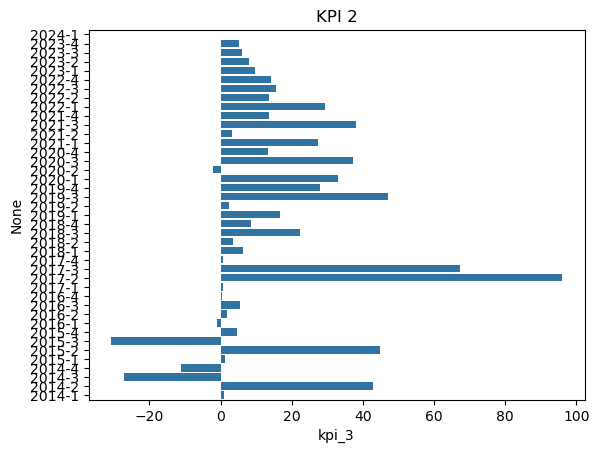

In [776]:
mask = df_acc_tegnologia['Provincia'] == 'Santa Fe'
data = df_acc_tegnologia[mask]
X = data['Año'].astype(str)+ '-' + data['Trimestre'].astype(str)

sns.barplot(x=data['kpi_3'], y=X, data=data, orient='h')
plt.title('KPI 2')

### DF finales

Se unificarán los df que corresponden a datos nacionales

In [777]:
df_penetrecion_nacional.head()

,Año,Trimestre,acc_cien_hogares,acc_cien_hab
0,2024,1,78.89,24.79
1,2023,4,78.56,24.66
2,2023,3,77.84,24.41
3,2023,2,77.02,24.14
4,2023,1,77.20,24.17


In [778]:
df_vmd

,Año,Trimestre,Provincia,vmd_prov,kpi_2
0,2024,1,Buenos Aires,155.186431,NaN
1,2023,4,Buenos Aires,155.533470,-0.223128
2,2023,3,Buenos Aires,143.208664,8.606187
3,2023,2,Buenos Aires,155.182083,-7.715722
4,2023,1,Buenos Aires,113.877665,36.270868
...,...,...,...,...,...
619,2018,4,Tucumán,16.574365,-0.006423
620,2018,3,Tucumán,15.244720,8.722000
621,2018,2,Tucumán,13.394334,13.814696
622,2018,1,Tucumán,15.212346,-11.950902


Se exporta a csv

In [779]:
df_penetrecion_nacional.to_csv('nacion.csv')

Se unfican también los datos organizados por provincias

In [780]:
df_pen_hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             984 non-null    int64  
 1   Trimestre       984 non-null    int64  
 2   Provincia       984 non-null    object 
 3   pen_c_cien_hog  984 non-null    float64
 4   kpi_1           960 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 38.6+ KB


In [781]:
df_pen_hogar.to_csv('penetracion.csv')

In [782]:
df_vmd.head()

,Año,Trimestre,Provincia,vmd_prov,kpi_2
0,2024,1,Buenos Aires,155.186431,NaN
1,2023,4,Buenos Aires,155.533470,-0.223128
2,2023,3,Buenos Aires,143.208664,8.606187
3,2023,2,Buenos Aires,155.182083,-7.715722
4,2023,1,Buenos Aires,113.877665,36.270868


In [783]:
df_vmd.to_csv('vmd.csv')

In [784]:
df_acc_tegnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           984 non-null    int64  
 1   Trimestre     984 non-null    int64  
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    int64  
 4   Cablemodem    984 non-null    int64  
 5   Fibra_óptica  984 non-null    int64  
 6   Wireless      984 non-null    int64  
 7   Total         984 non-null    int64  
 8   kpi_3         954 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 69.3+ KB


In [785]:
df_acc_tegnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_óptica,Wireless,Total,kpi_3
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,5044557,NaN
1,2023,4,Buenos Aires,223391,2797700,1784593,137993,5011620,0.808027
2,2023,3,Buenos Aires,237705,2784175,1740239,137921,4968237,2.548730
3,2023,2,Buenos Aires,265537,2766463,1645945,138405,4885488,5.728867
4,2023,1,Buenos Aires,304583,2761043,1551074,132458,4820928,6.116472


In [786]:
df_acc_tegnologia.to_csv('tecnologias.csv')

Creamos un df para almacenar la descripción de los trimestres


In [787]:
df_trimestres = pd.DataFrame({'Trimestre':[1,2,3,4],
                              'name':['Enero-Marzo','Abril-Junio','Julio-Septiembre','Octubre-Diciembre']})
df_trimestres

,Trimestre,name
0,1,Enero-Marzo
1,2,Abril-Junio
2,3,Julio-Septiembre
3,4,Octubre-Diciembre


In [788]:
df_trimestres.to_csv('trimestres.csv')